In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Scene:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    

    def init_swarm(self, number_of_particles: int):
        swarm = []
        for _ in np.arange(number_of_particles):
            swarm.append([[np.random.uniform(0,self.width), np.random.uniform(0,self.height)],[np.random.uniform(-1,1), np.random.uniform(-1,1)]])
        return np.array(swarm)

    
    def get_neighbors(self, particle, swarm, interaction_radius):
        return swarm[np.linalg.norm(swarm[:,0] - particle[0], axis=1) <= interaction_radius]

In [9]:
def wrap_particle(particle, scene_width, scene_height):
    if particle[0,0] < 0:
        particle[0,0] += scene_width
    if particle[0,0] > scene_width:
        particle[0,0] -= scene_width
    if particle[0,1] < 0:
        particle[0,1] += scene_height
    if particle[0,1] > scene_height:
        particle[0,1] -= scene_height
    return particle


# Each particle has the following structure:
#   [[x,y],2d_direction_vector]


def update_particle(particle, neighbors, cohesion_factor, separation_factor, velocity):
    avg_angle = np.arctan2(particle[0,1], particle[0,0])
    avg_position = particle[0]
    avg_distance = np.array([0,0])
    if neighbors.shape[0] > 1:
        avg_position = np.mean(neighbors[:,0],axis=0)
        avg_angle = np.arctan2(np.mean(neighbors[:,:,1], axis=0)[0], np.mean(neighbors[:,:,0], axis=0)[0])
        norm_sq = np.linalg.norm(particle[0] - neighbors[:,0], axis=1) ** 2
        particle_index = np.argmin(norm_sq)
        neighbors, norm_sq = np.delete(neighbors, particle_index, axis=0), np.delete(norm_sq, particle_index, axis=0)
        avg_distance = np.sum((neighbors[:,0] - particle[0]) / np.array([norm_sq,norm_sq]).T, axis=0) / (neighbors.shape[0] + 1)
    avg_angle += (np.random.random() * 0.5) - 0.25
    particle[1,0], particle[1,1] = np.cos(avg_angle), np.sin(avg_angle)
    cohesion = (avg_position - particle[0]) / cohesion_factor
    particle[1] += cohesion
    avg_distance *= separation_factor
    particle[1] += avg_distance
    particle[1] *= velocity
    particle[0] += particle[1]
    return particle

In [10]:
arr = np.array([[[50,50],[12, 23]], [[100,100],[33,45]], [[150,150],[33,45]], [[200,200],[33,45]]])
particle = np.array([[75,75],[12,53]])
norm = np.linalg.norm(particle[0] - arr[:,0], axis=1) ** 2
np.sum((arr[:,0] - particle[0]) / np.array([norm,norm]).T, axis=0)

np.array([1,2]) + np.array([3,4])

array([4, 6])

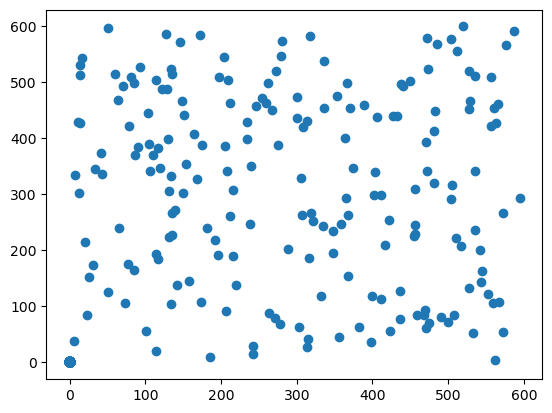

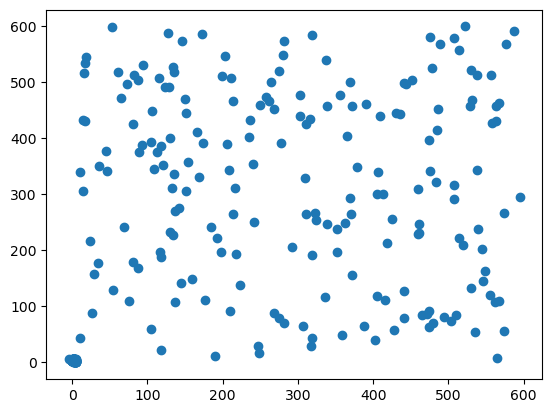

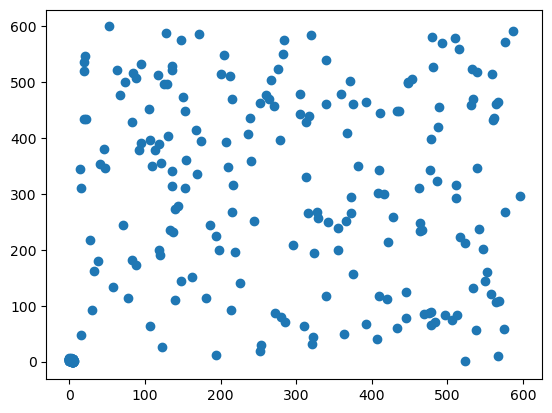

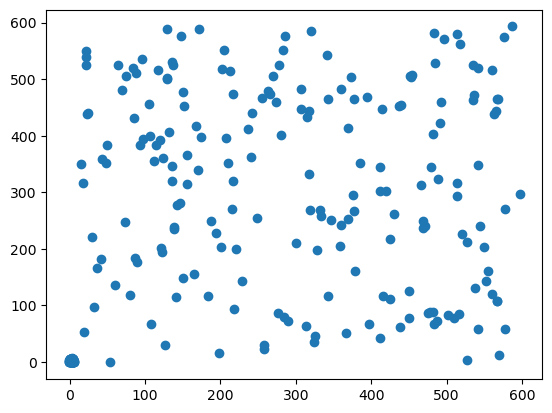

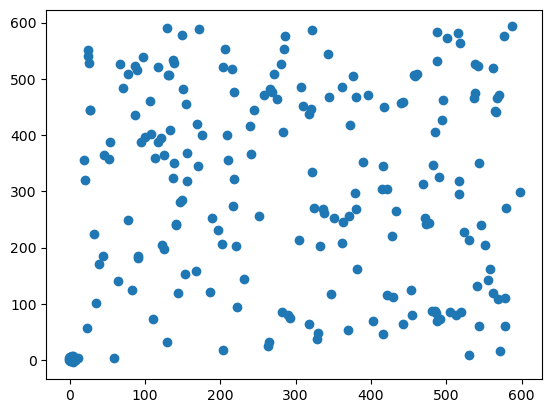

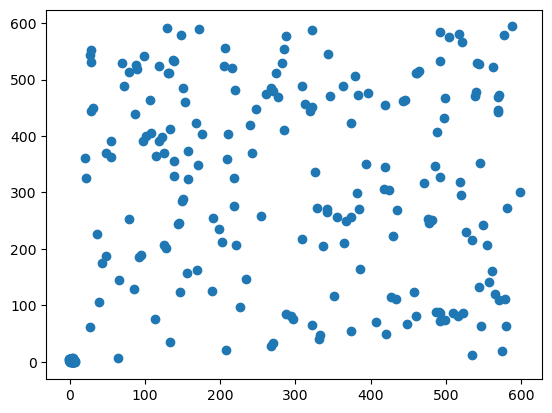

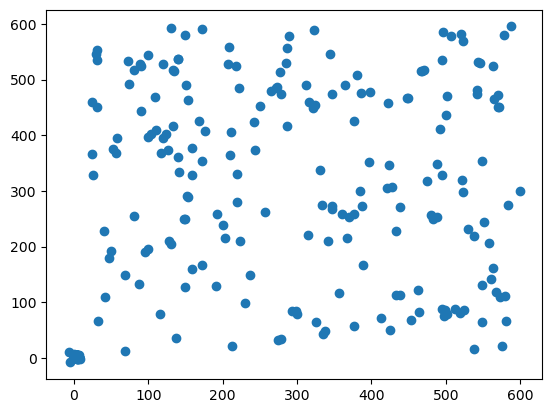

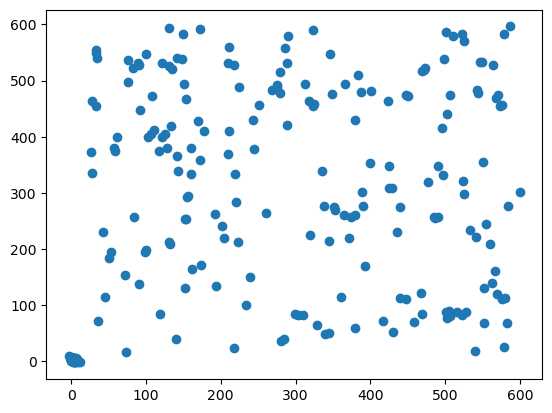

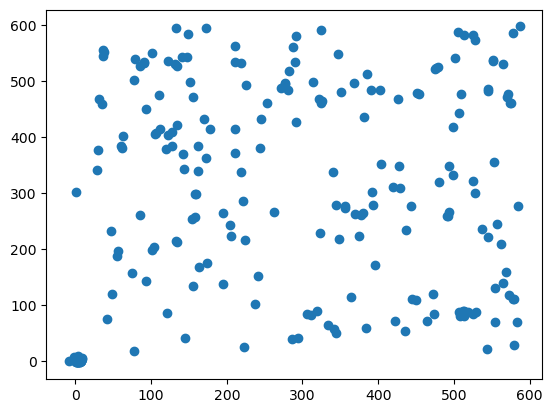

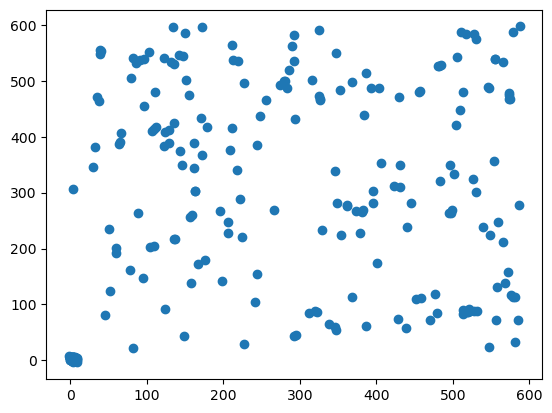

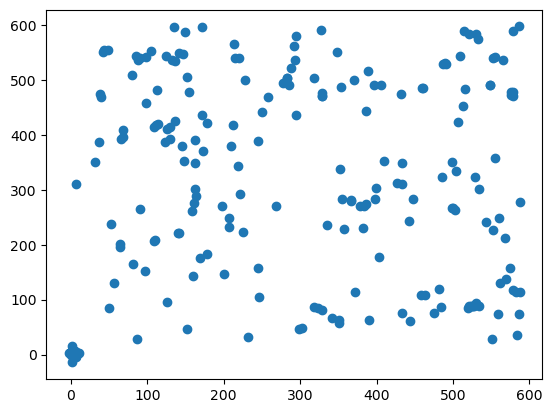

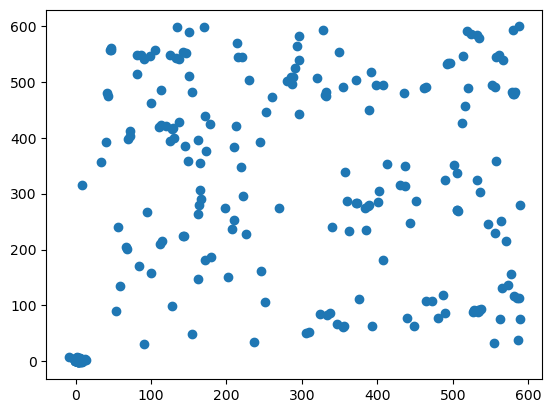

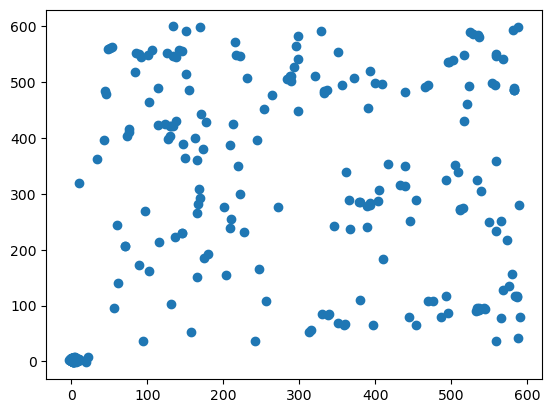

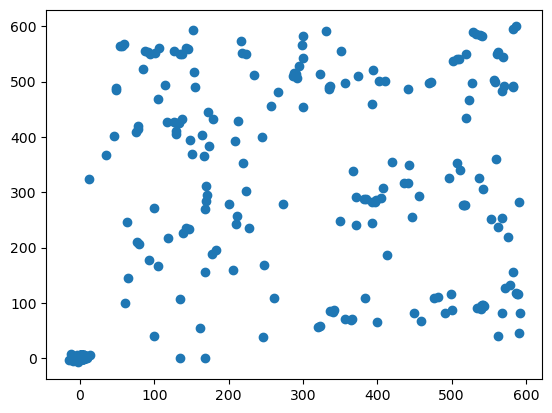

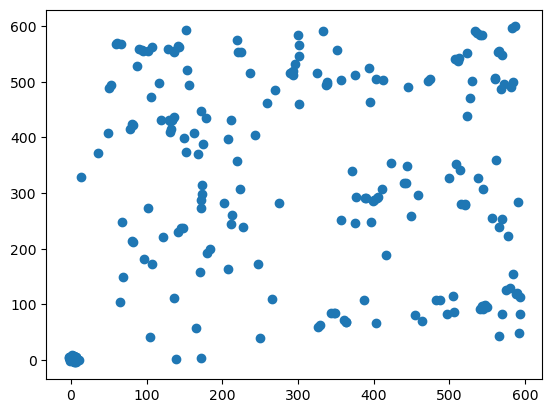

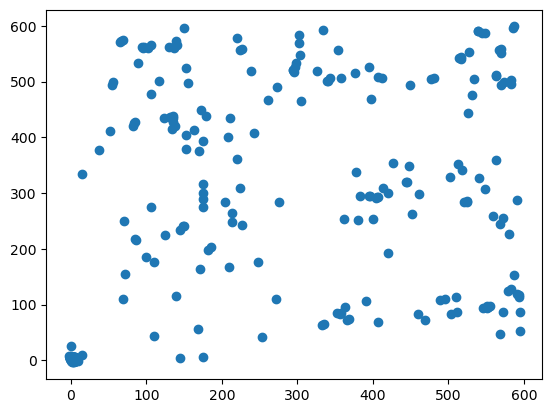

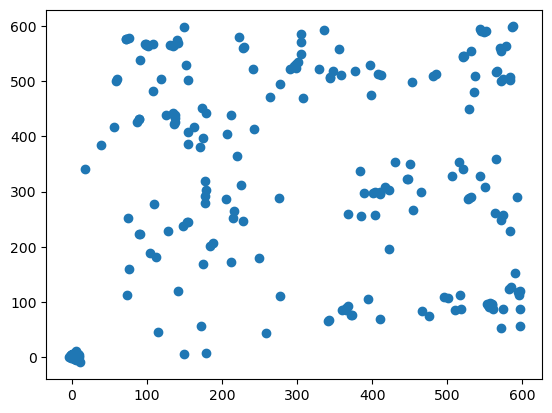

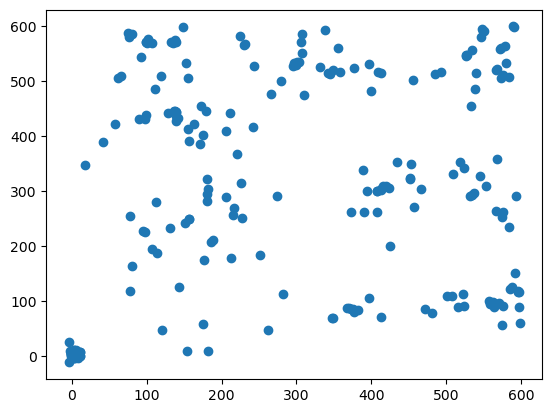

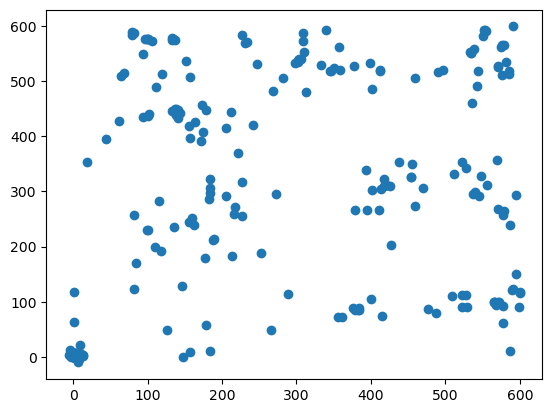

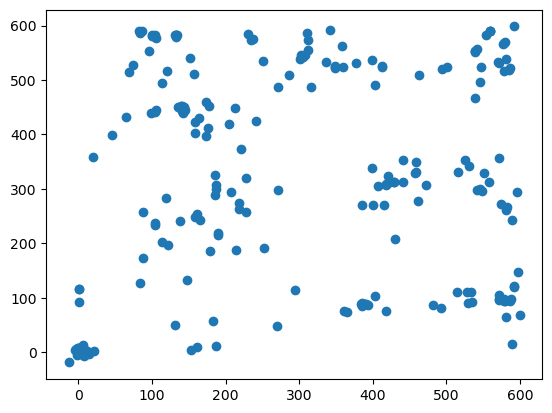

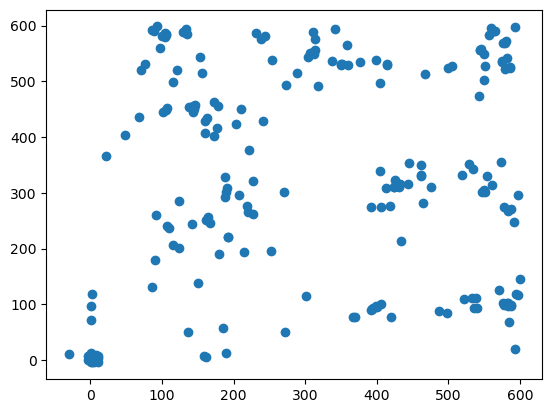

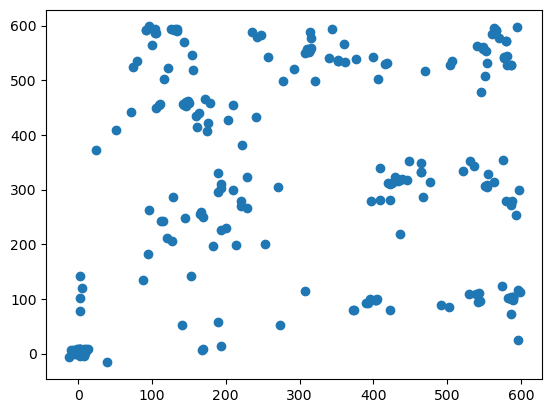

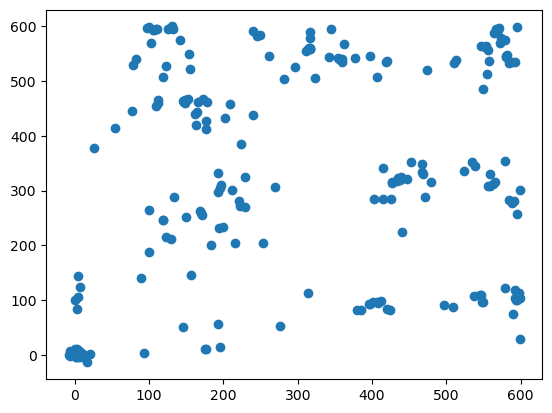

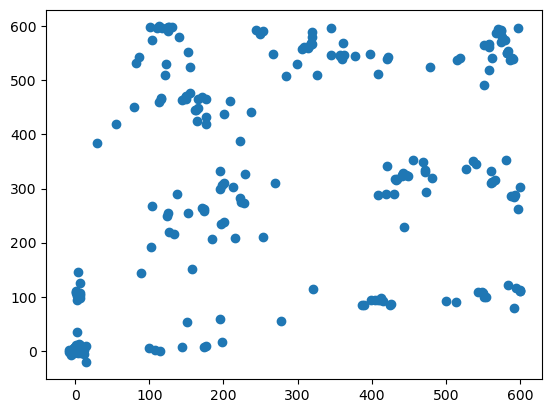

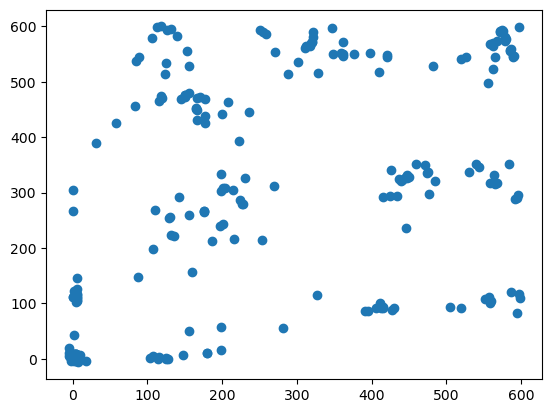

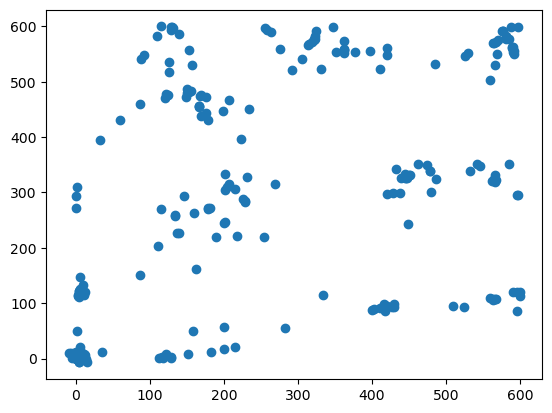

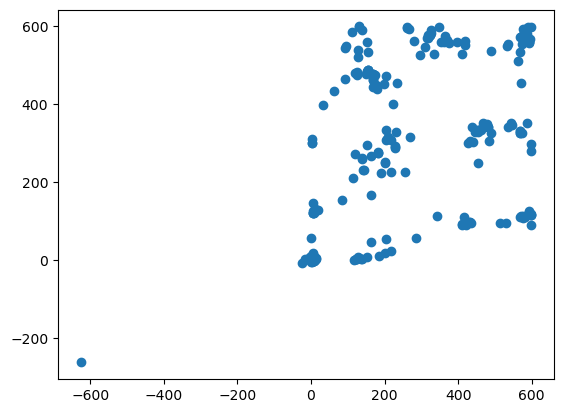

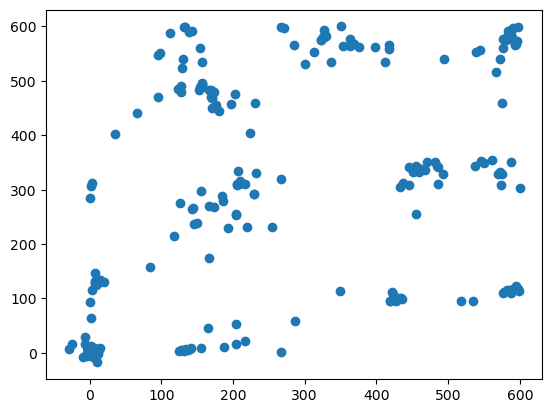

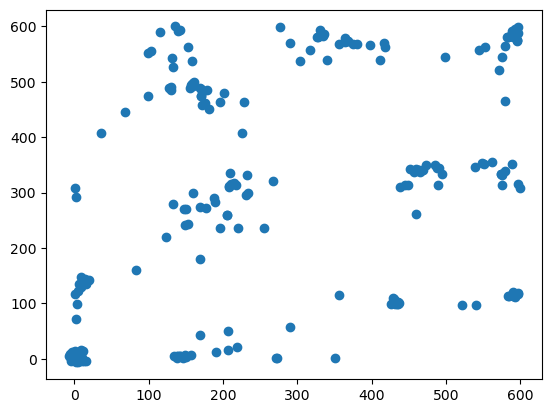

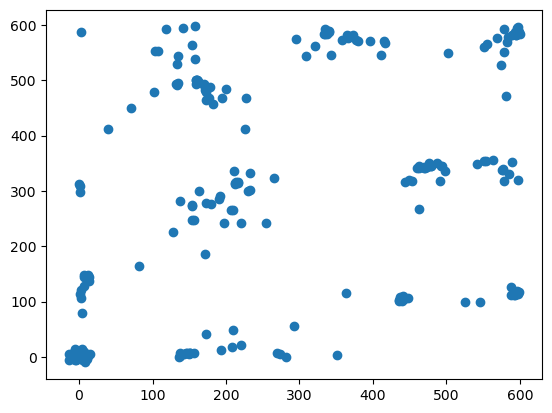

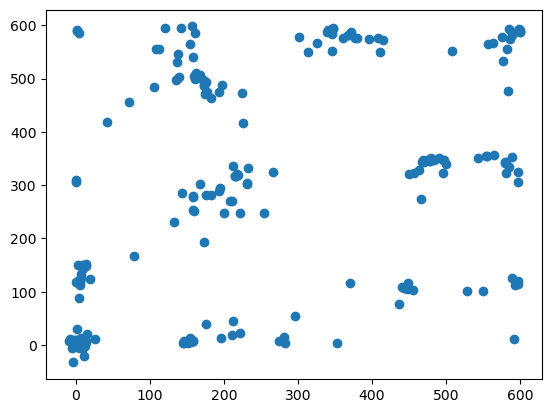

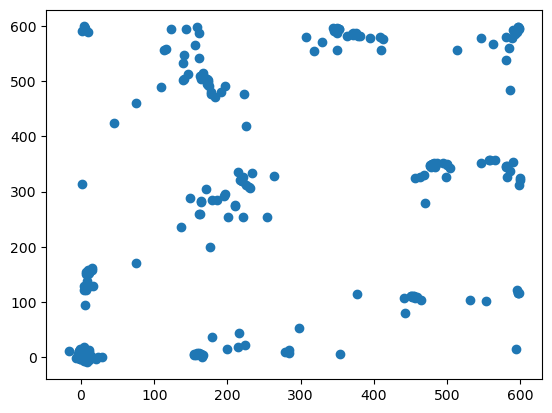

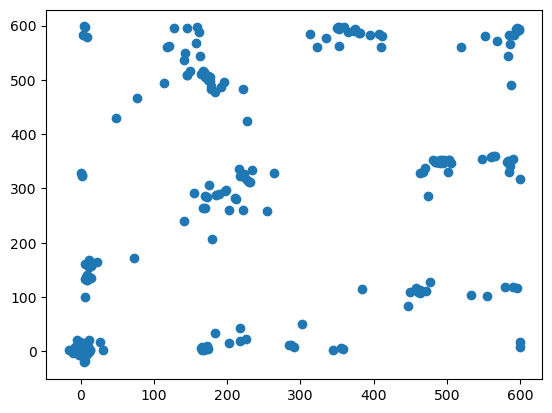

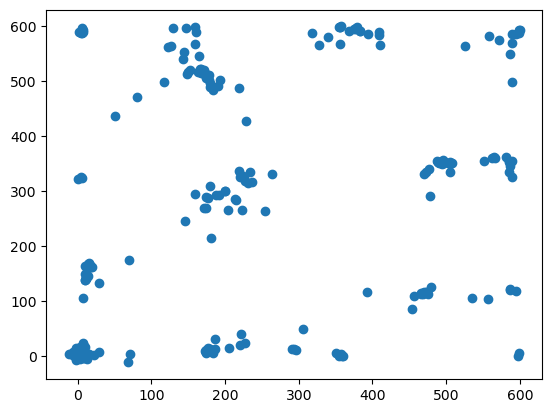

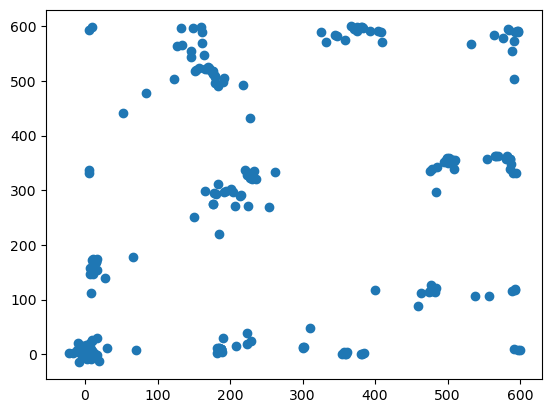

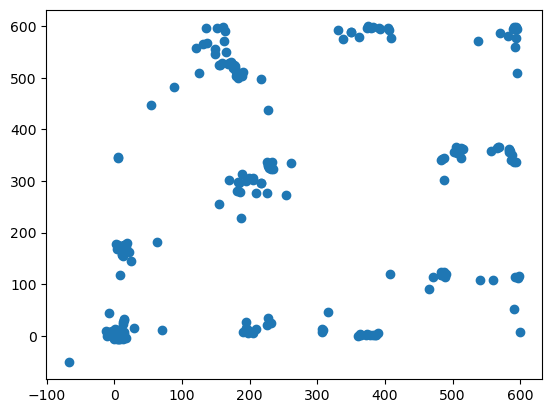

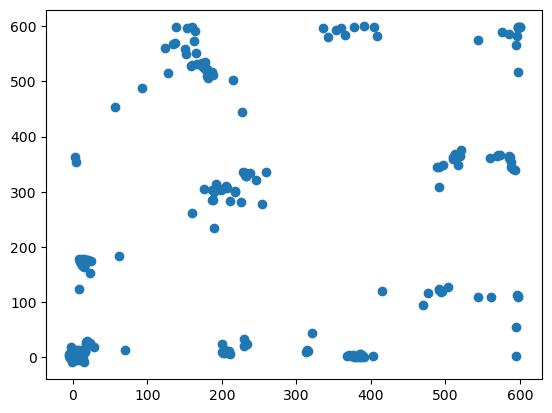

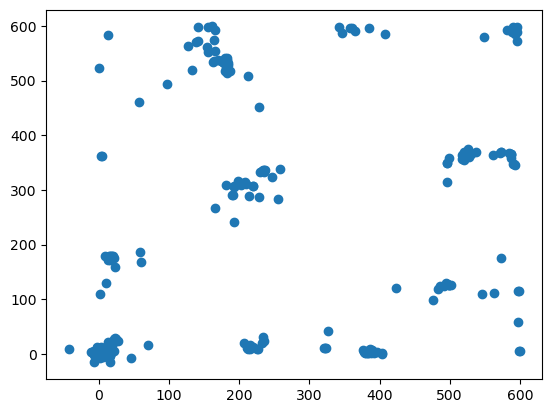

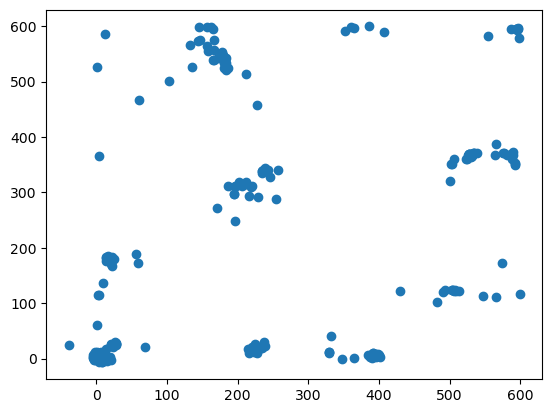

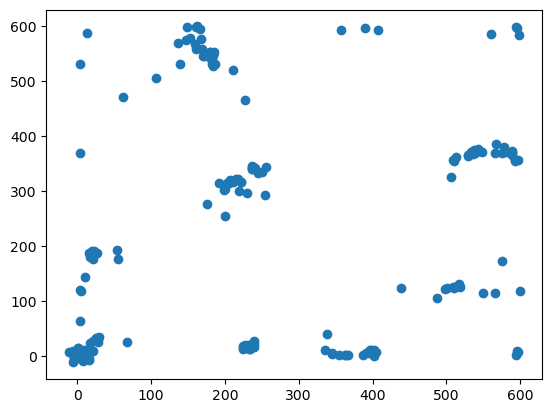

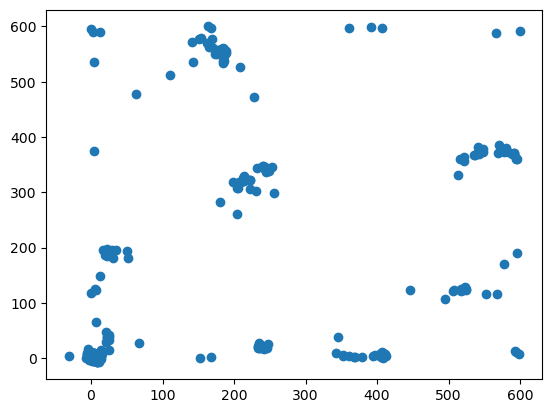

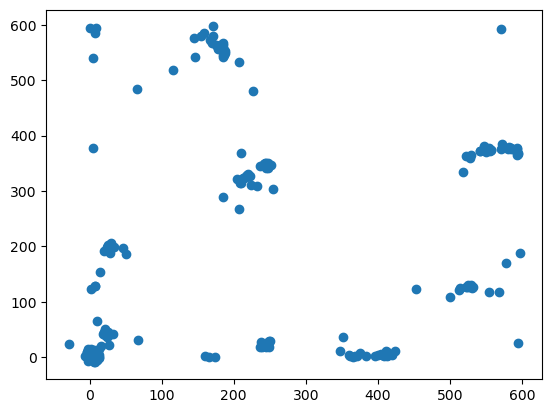

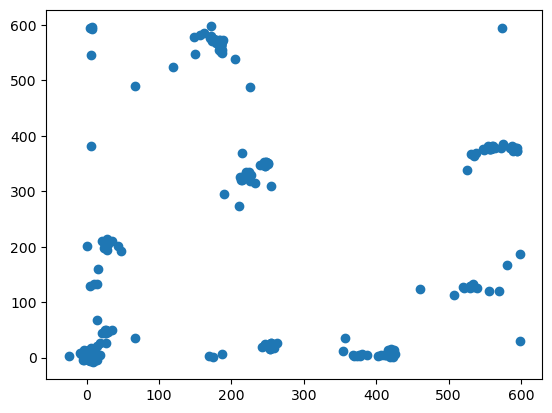

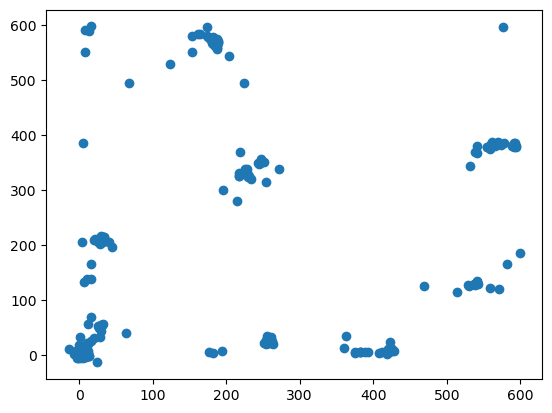

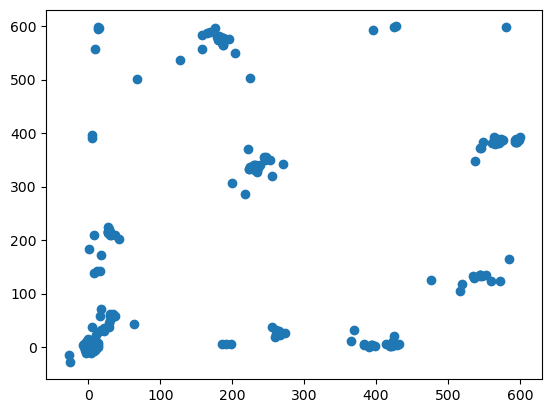

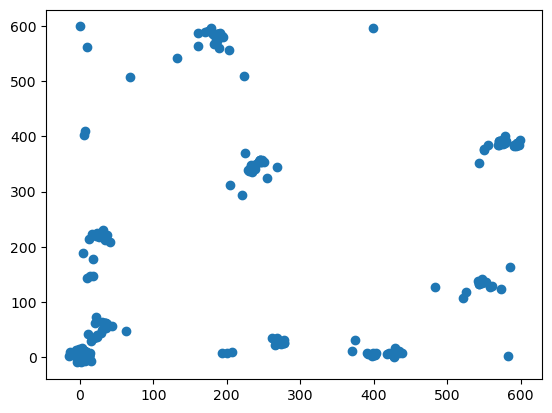

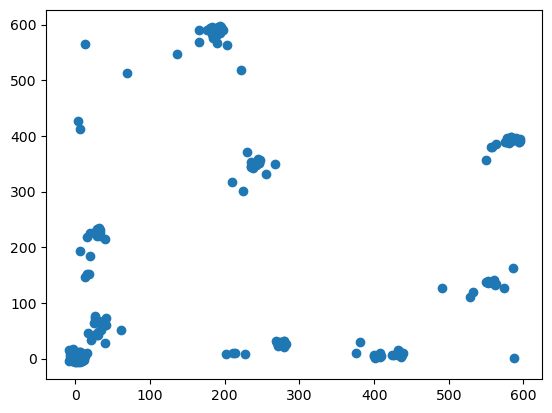

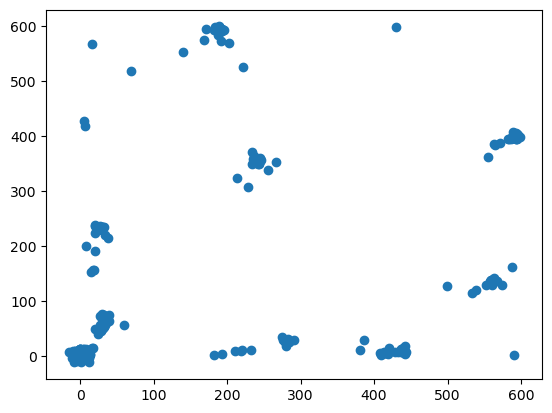

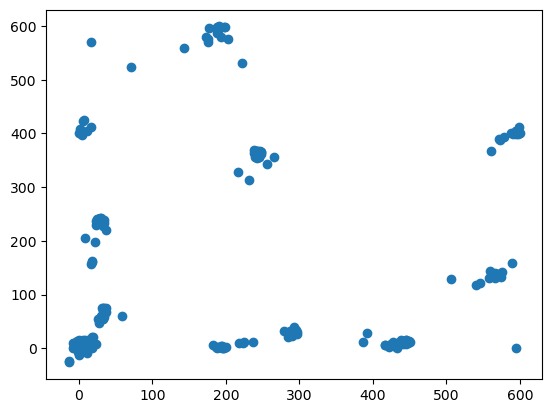

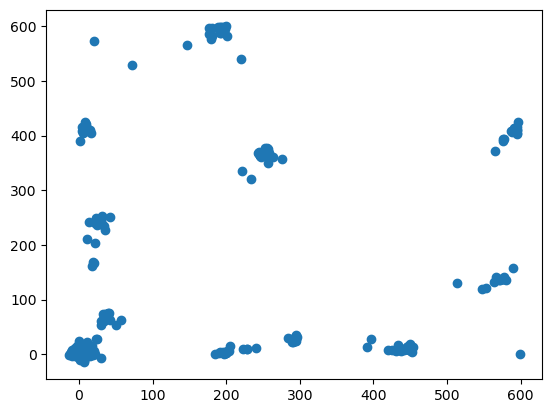

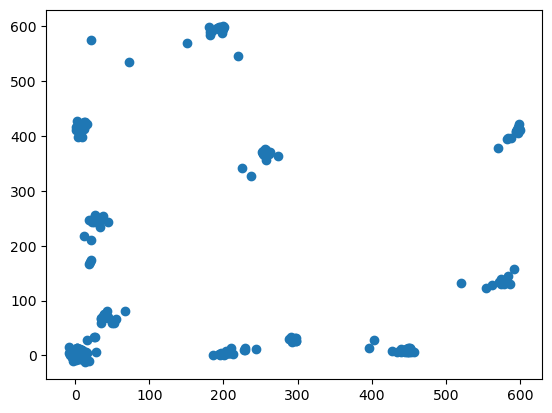

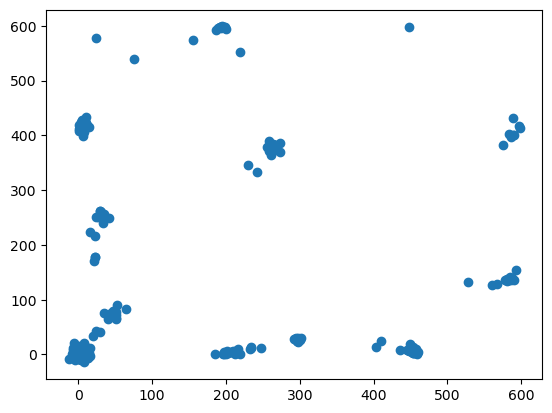

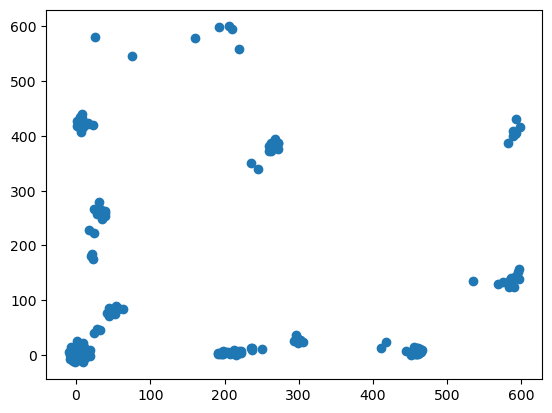

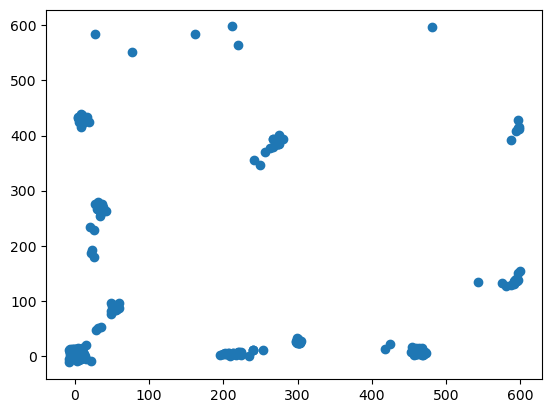

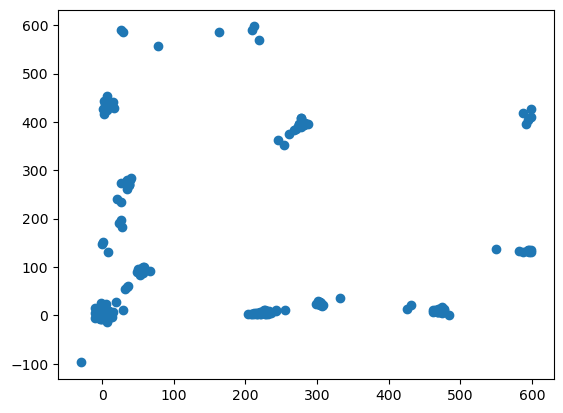

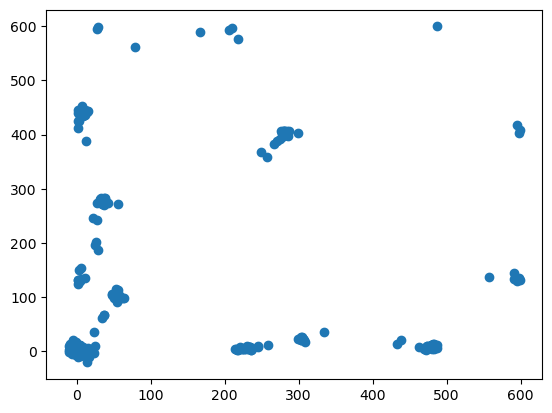

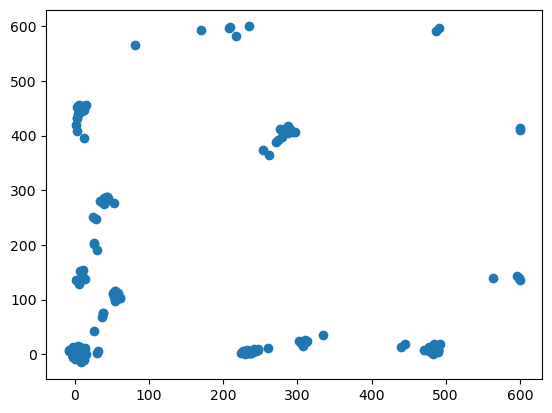

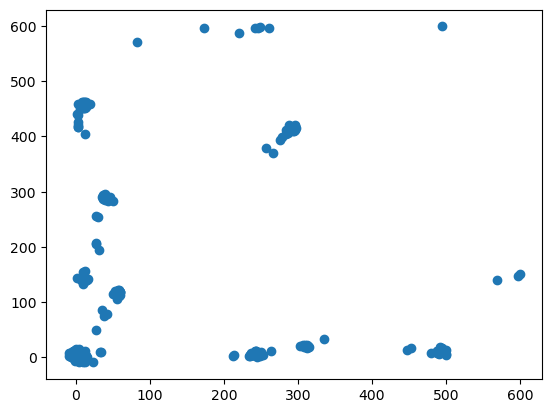

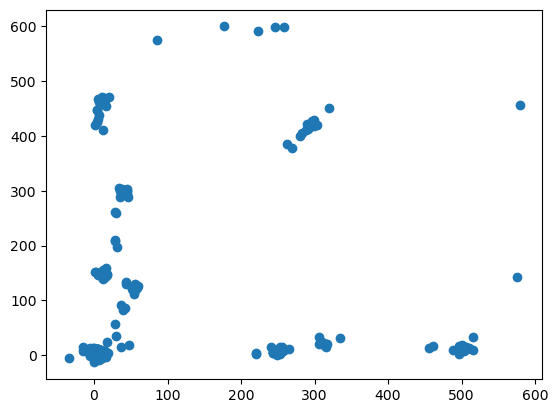

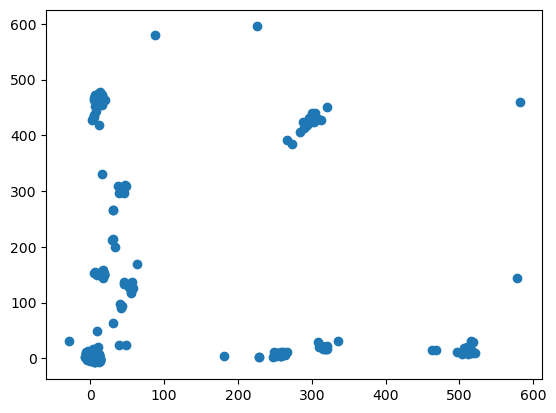

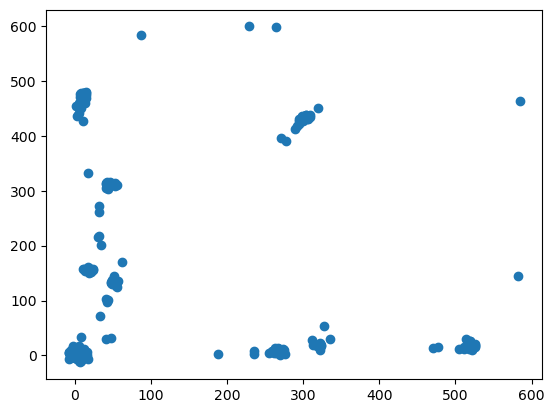

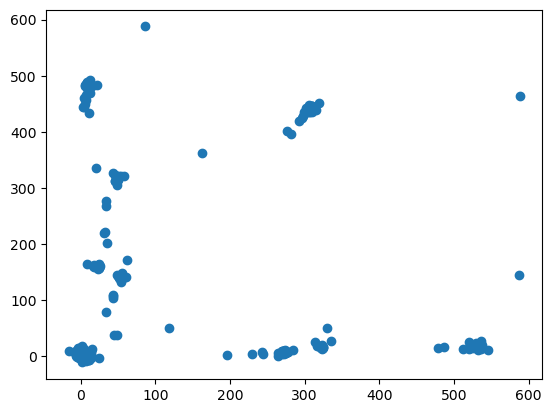

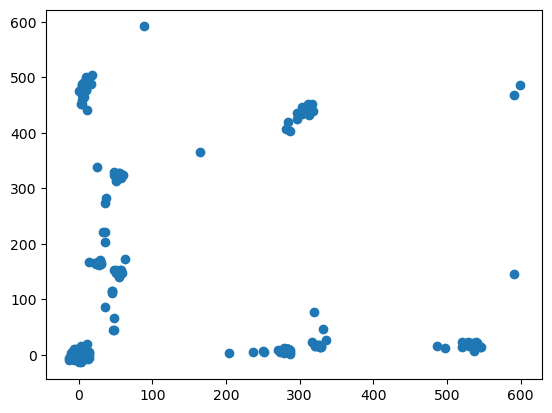

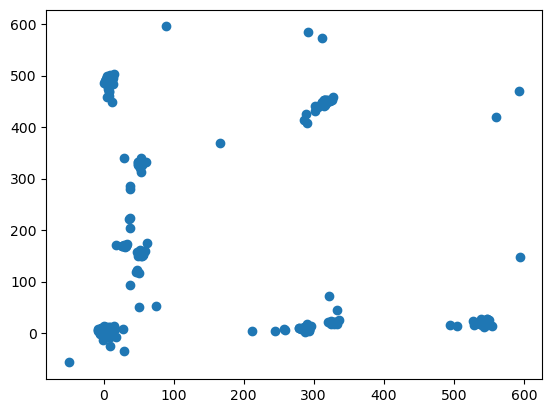

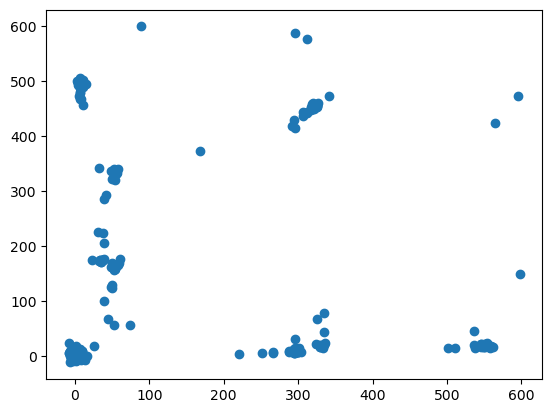

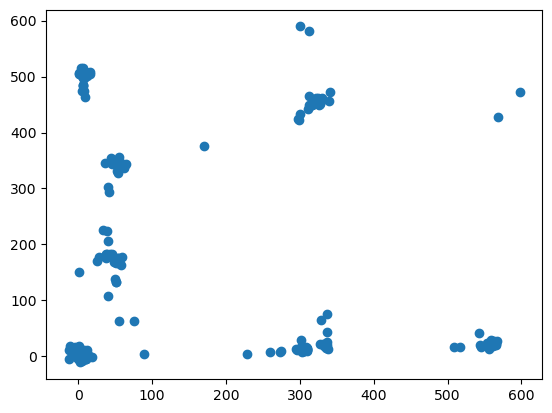

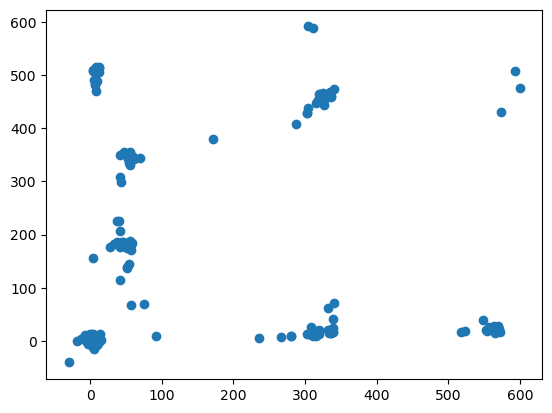

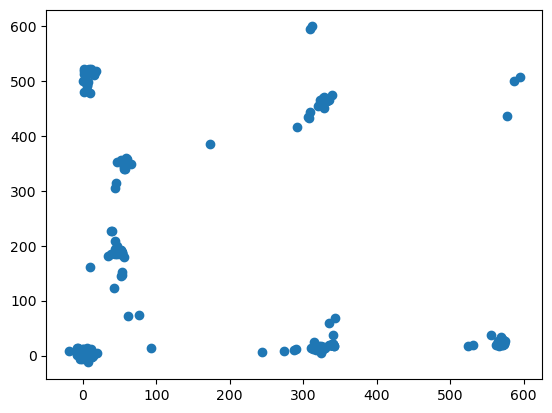

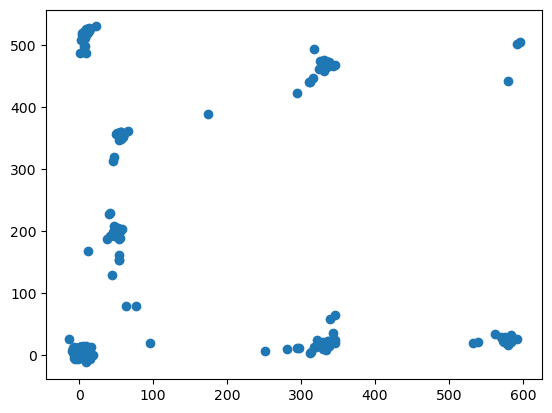

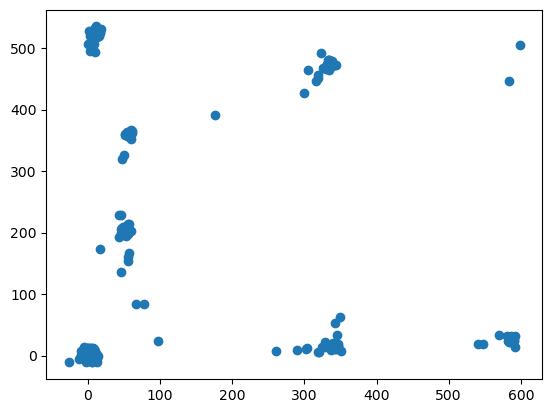

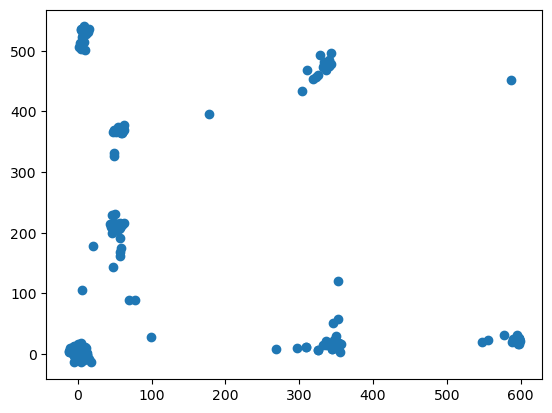

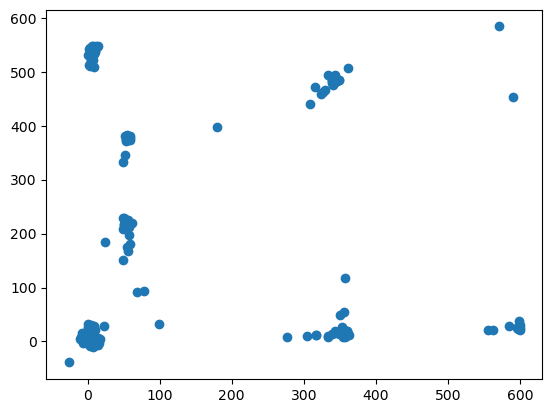

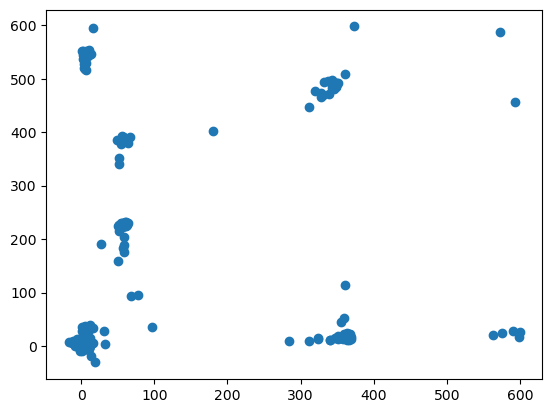

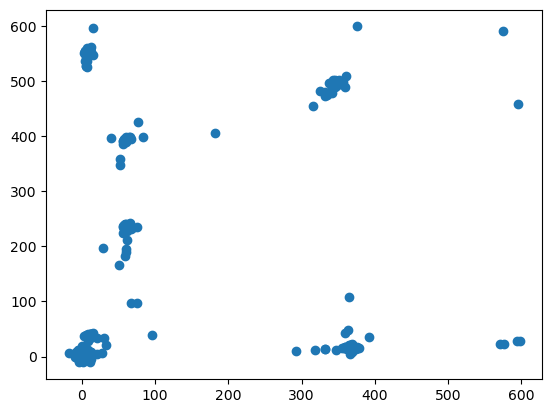

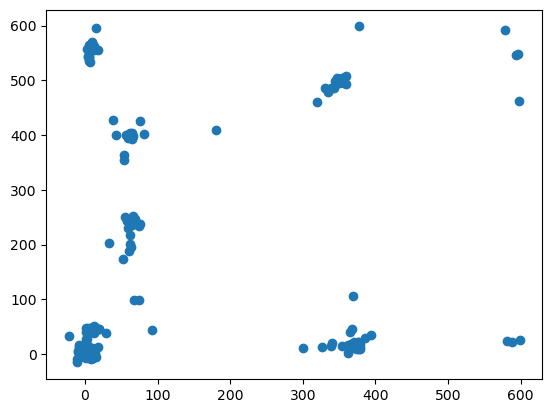

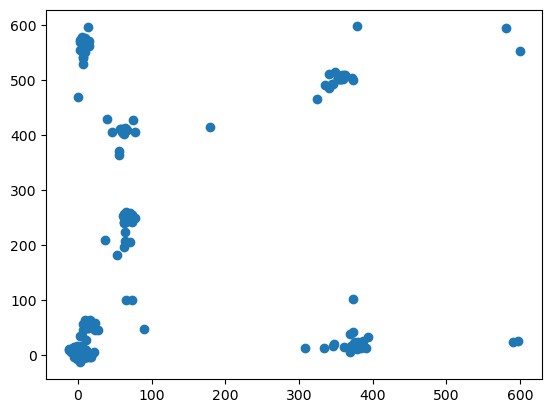

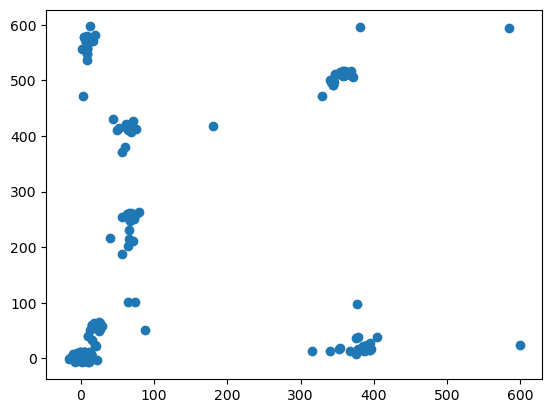

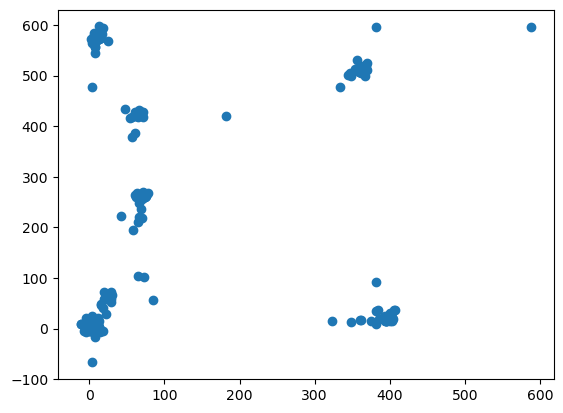

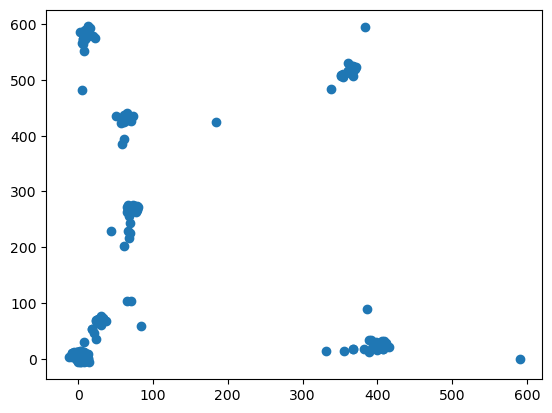

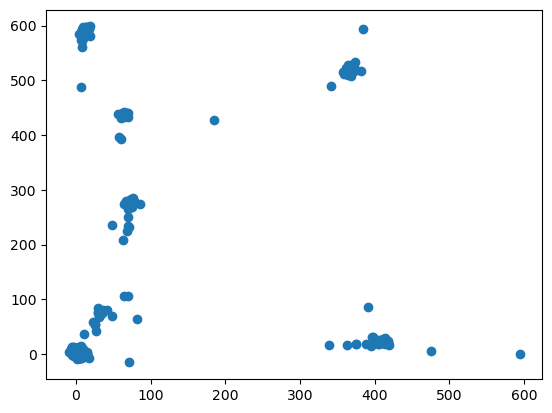

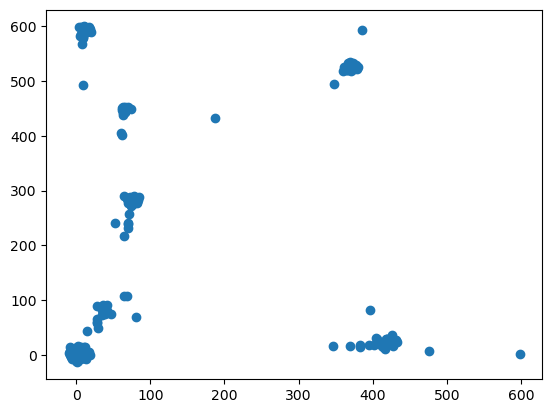

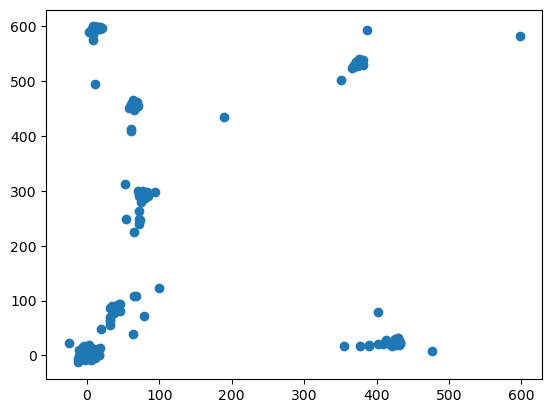

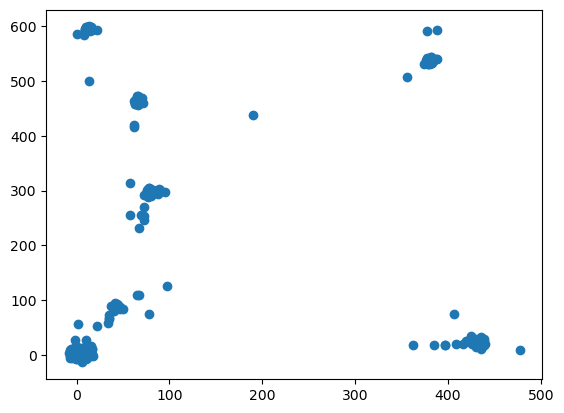

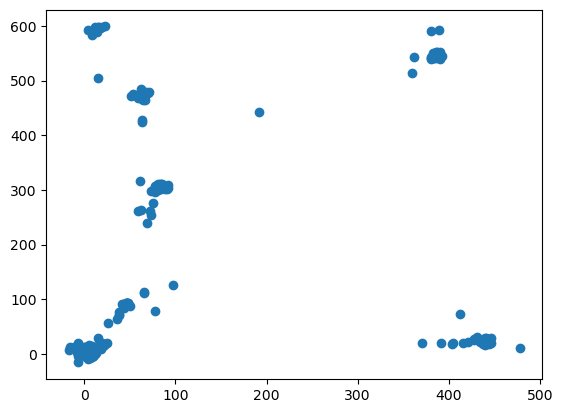

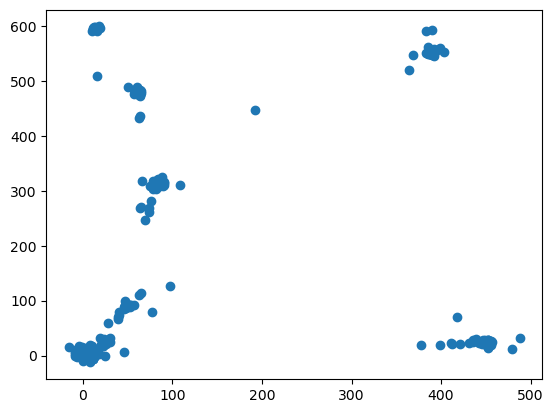

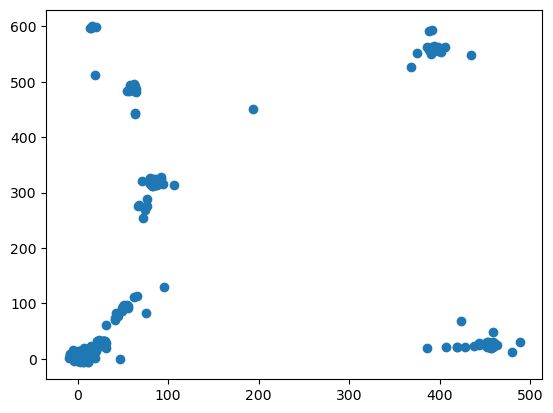

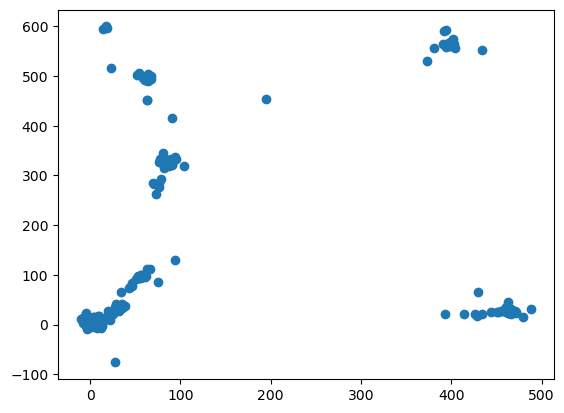

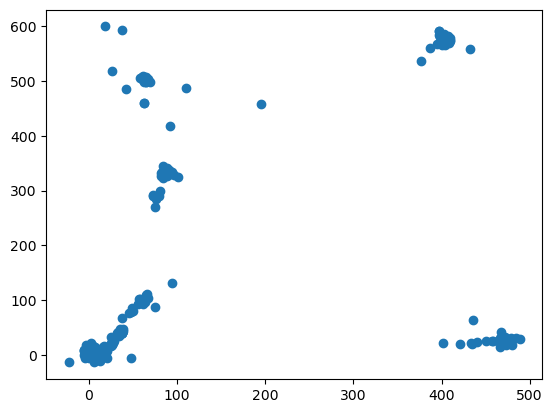

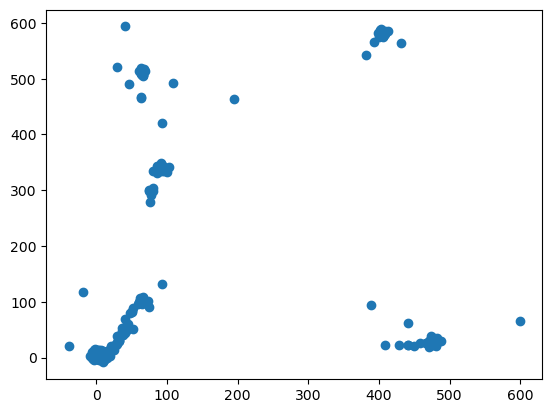

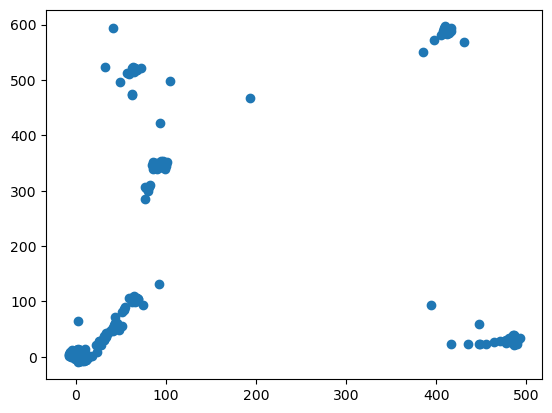

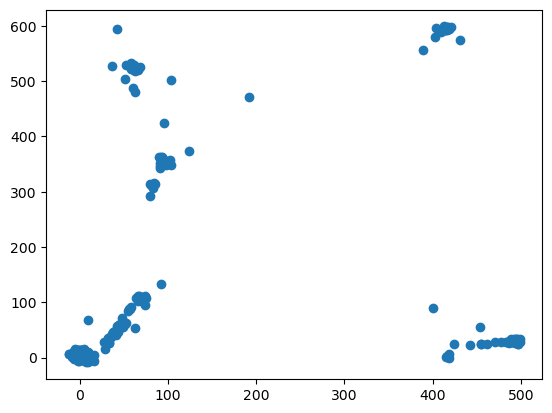

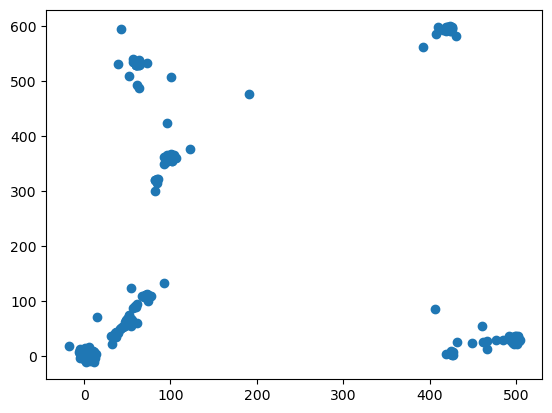

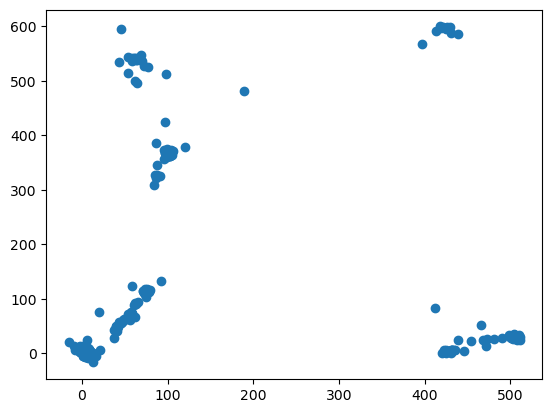

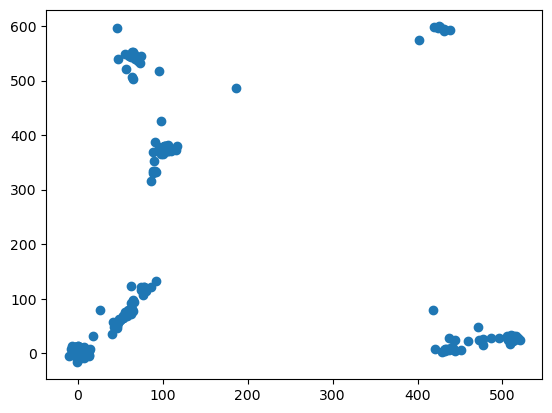

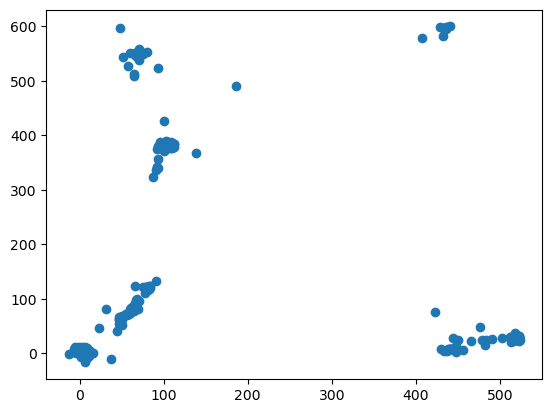

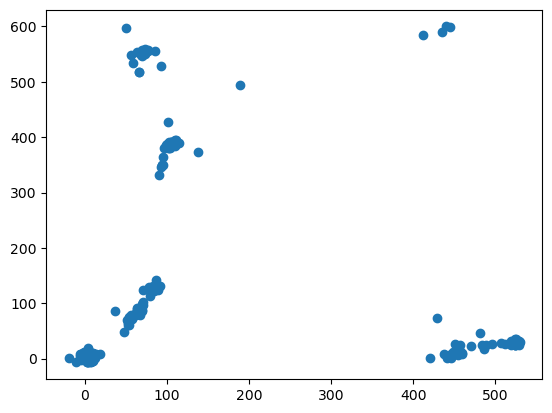

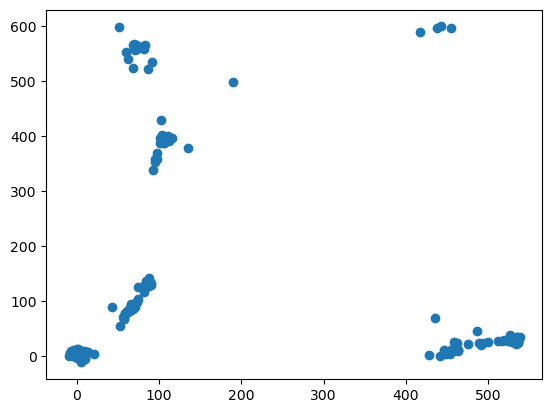

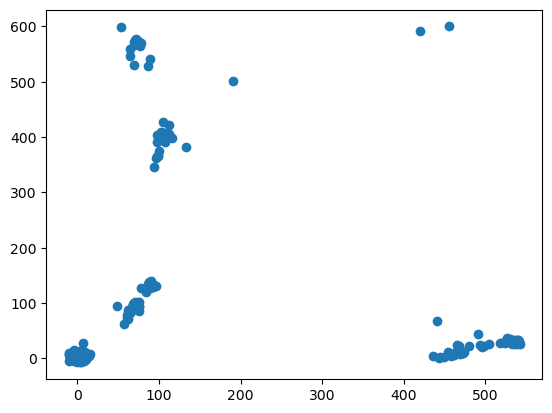

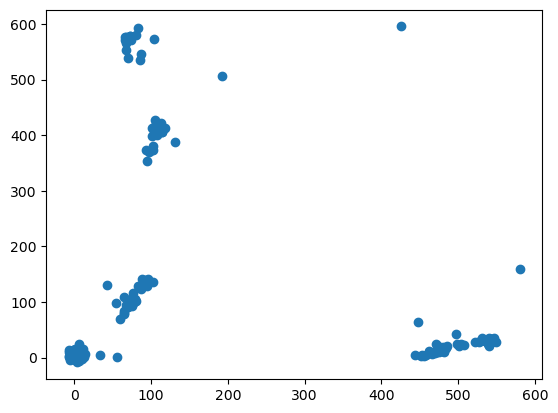

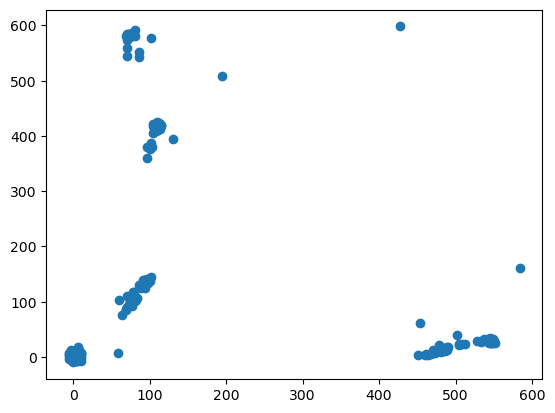

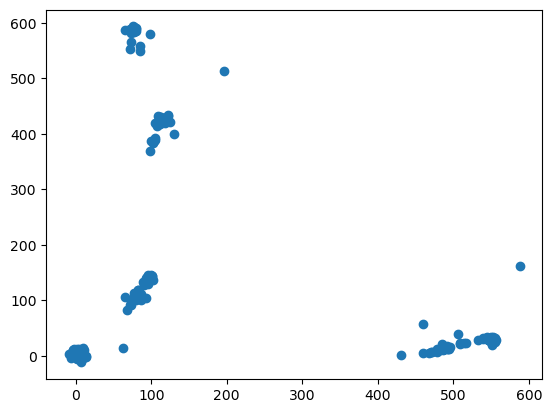

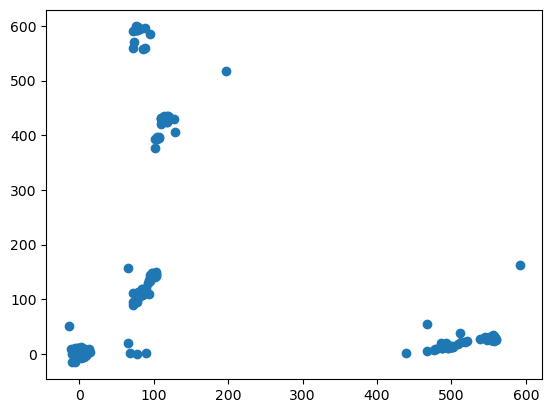

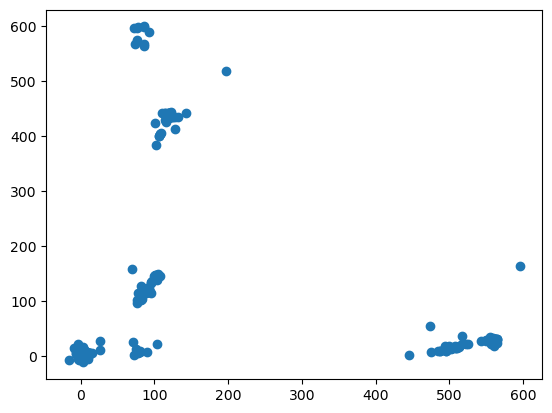

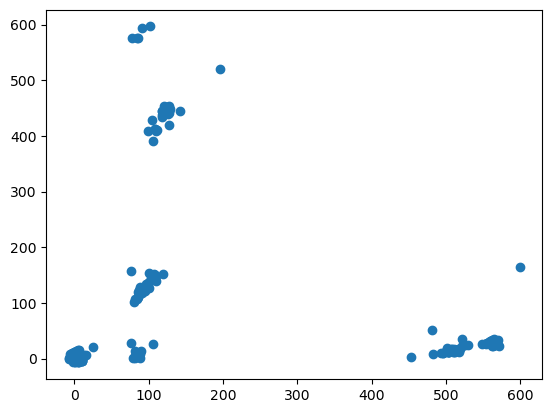

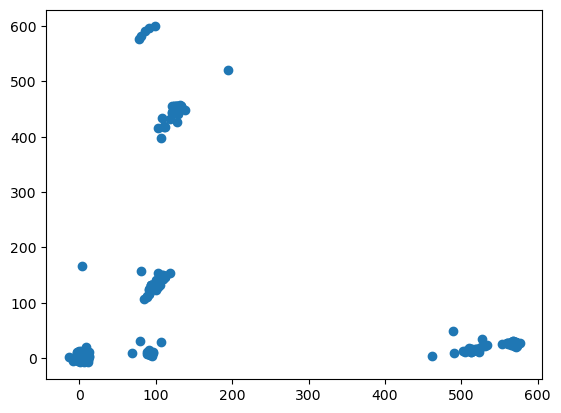

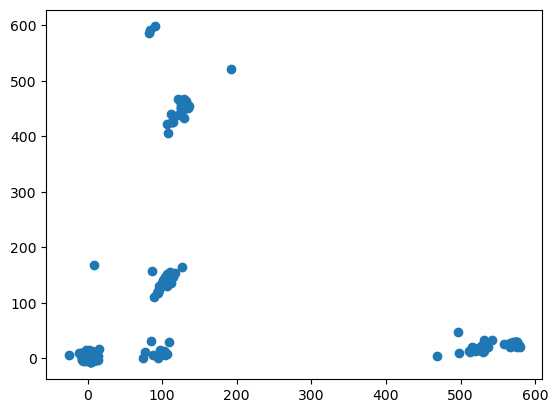

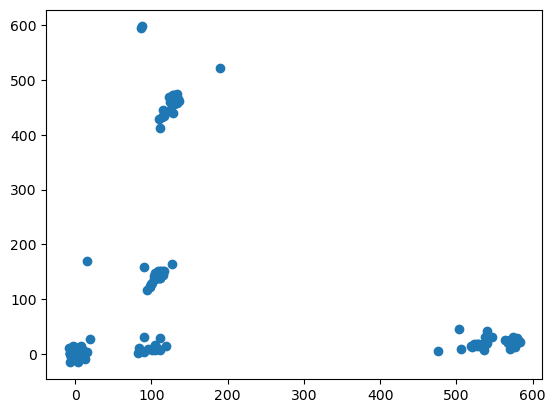

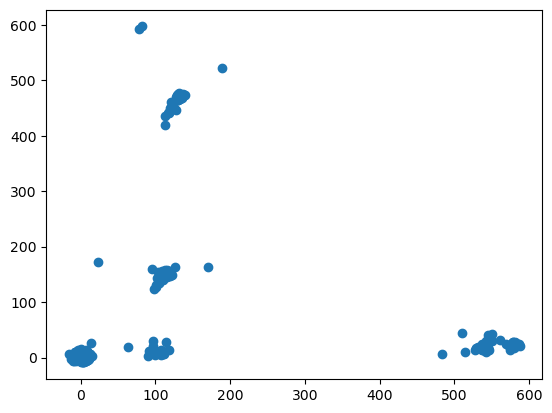

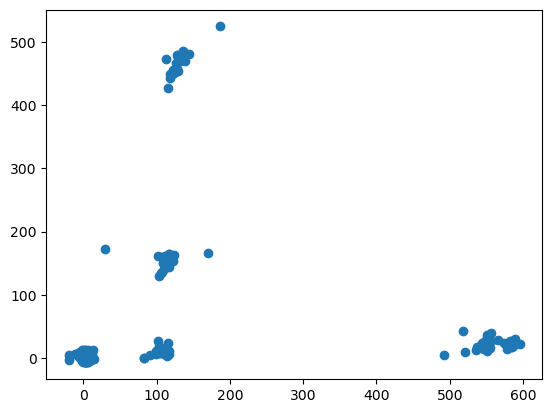

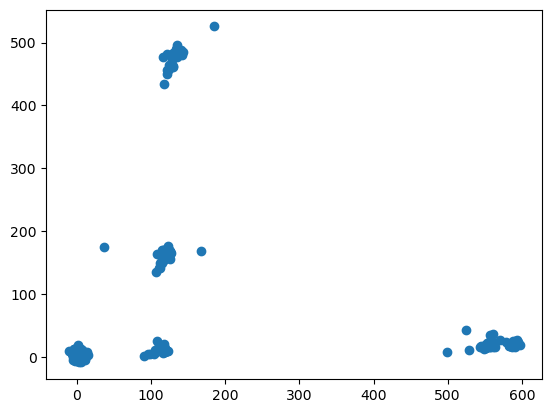

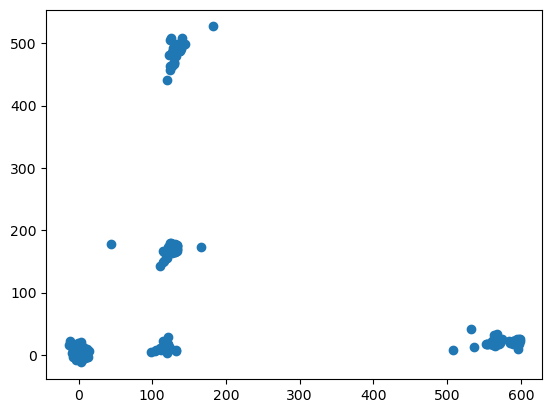

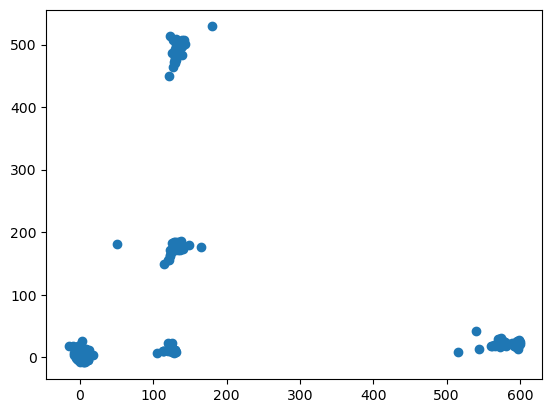

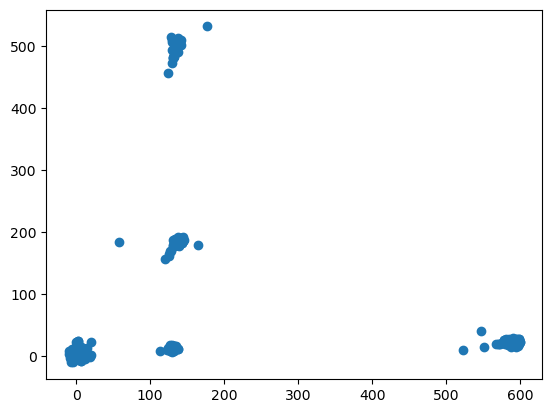

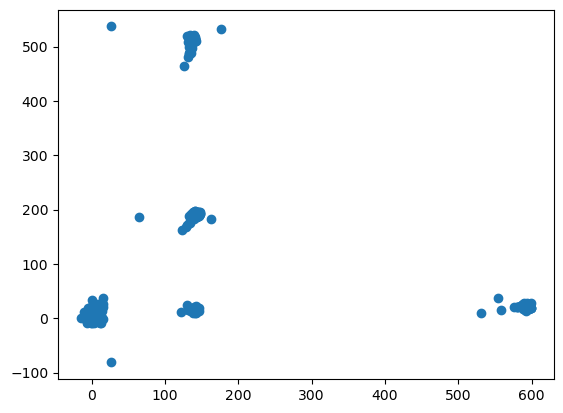

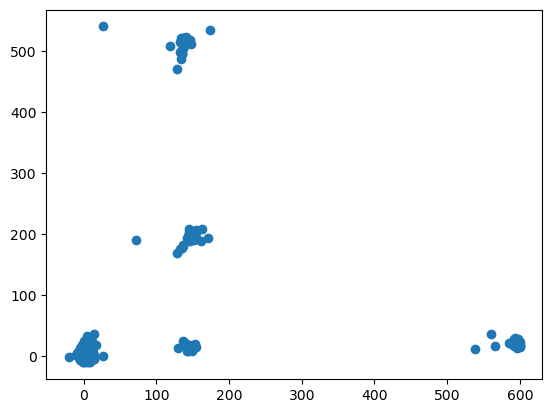

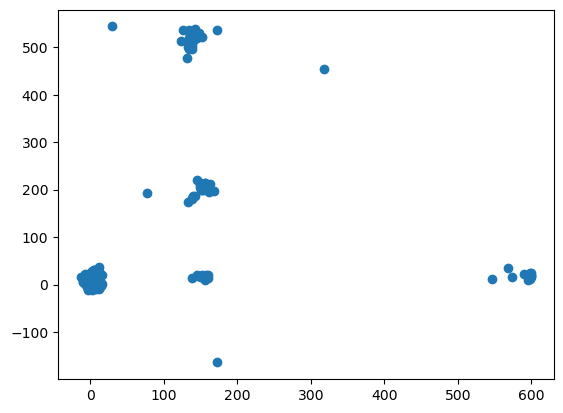

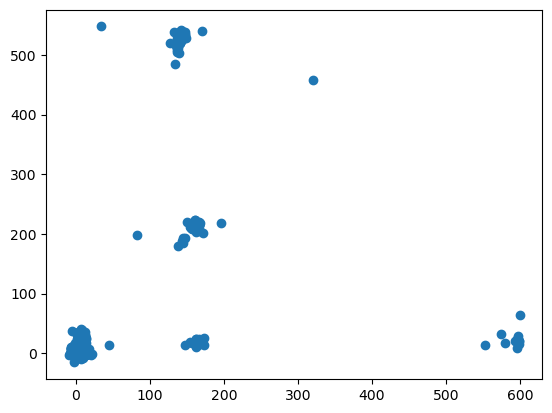

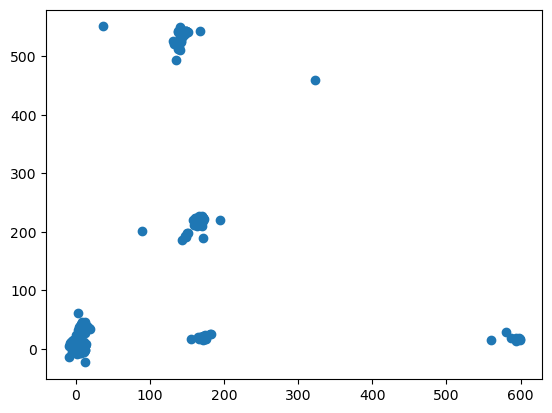

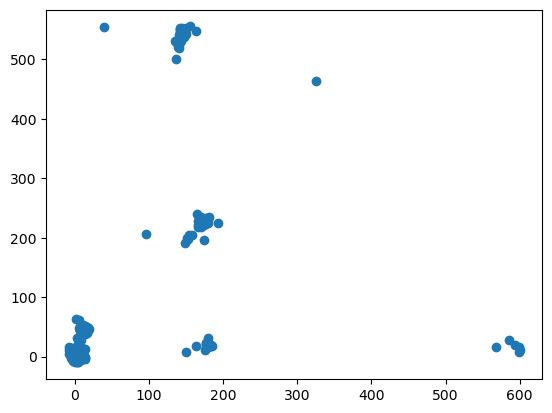

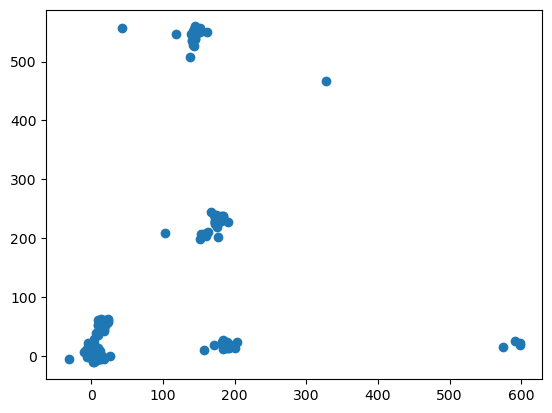

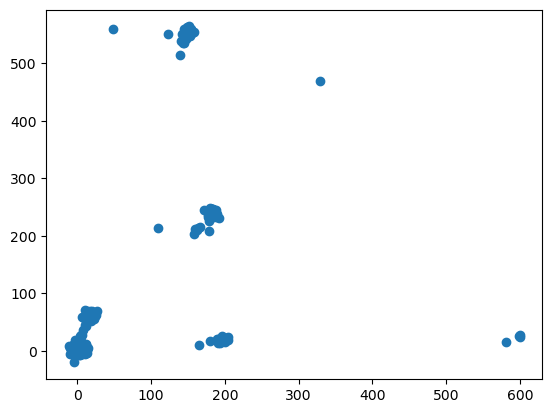

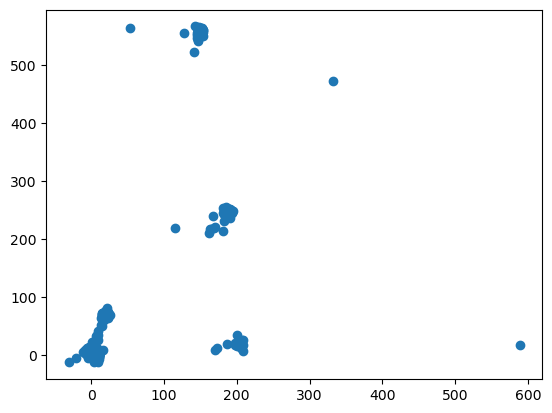

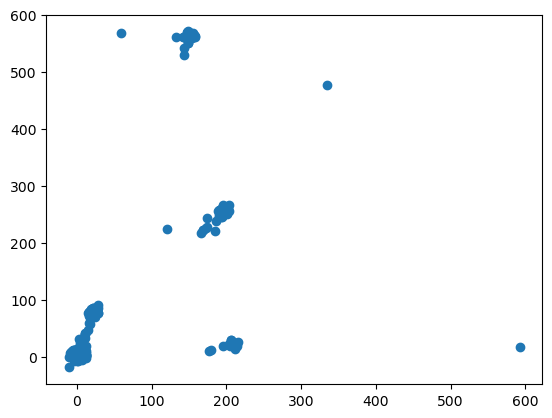

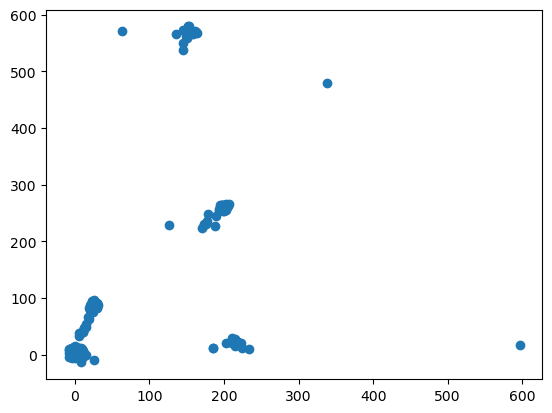

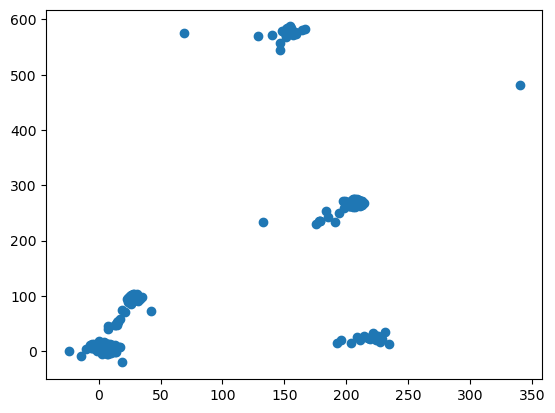

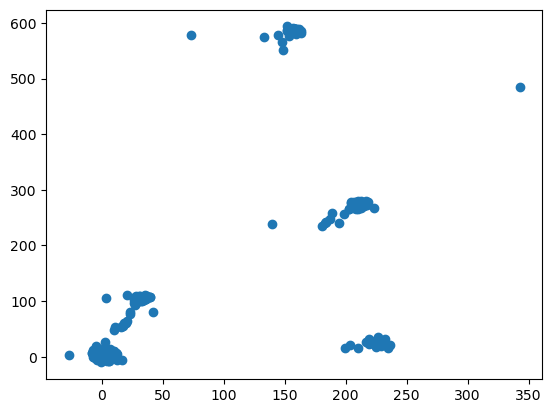

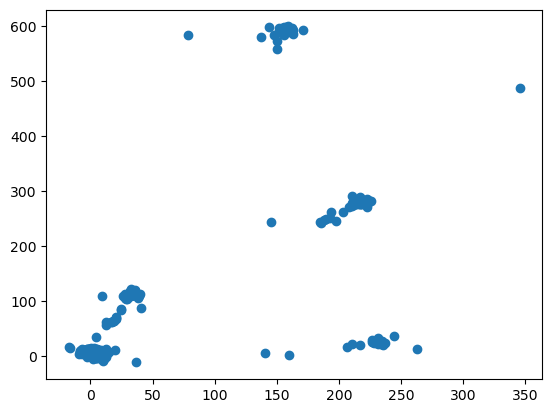

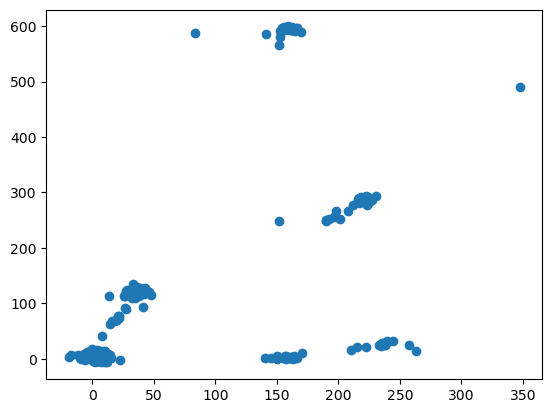

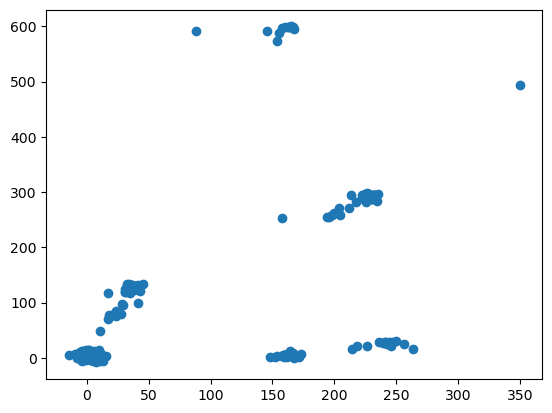

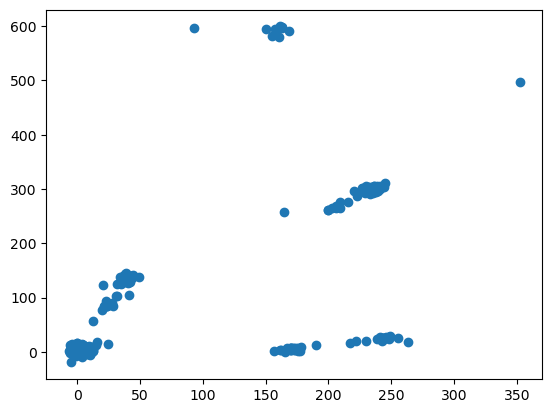

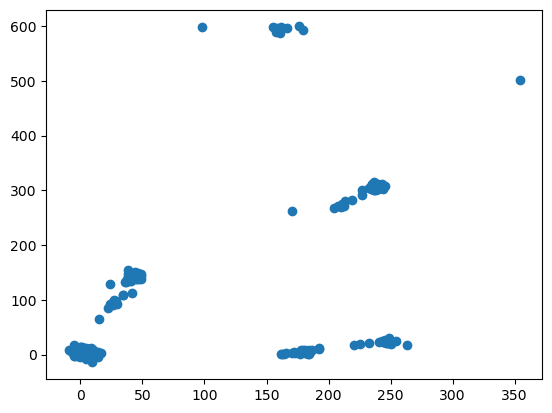

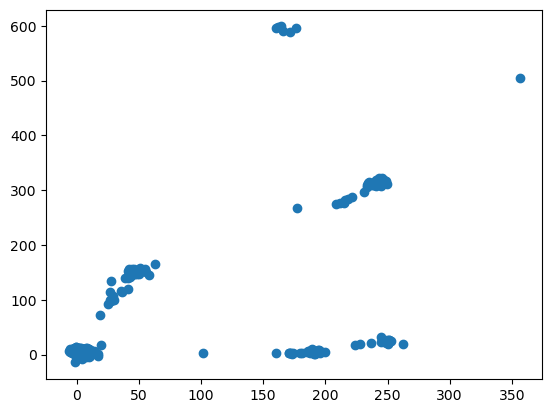

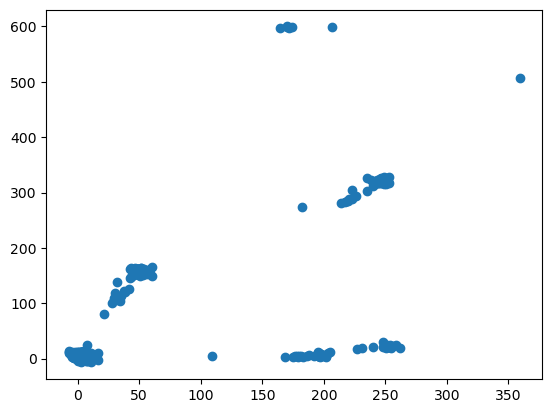

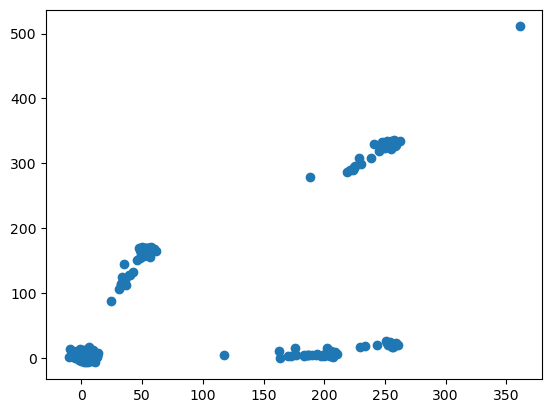

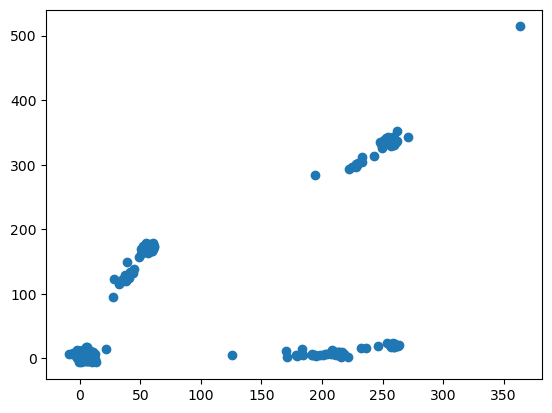

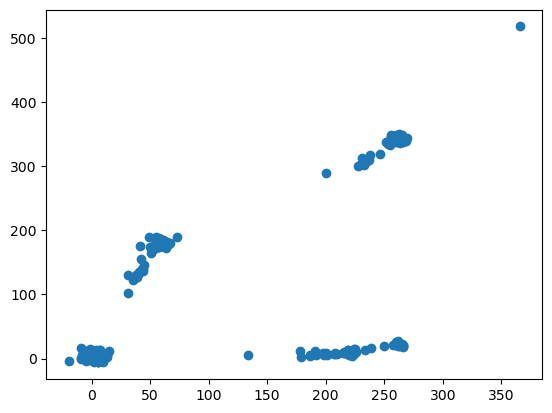

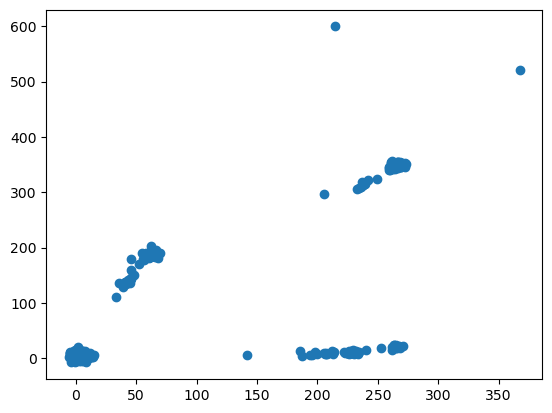

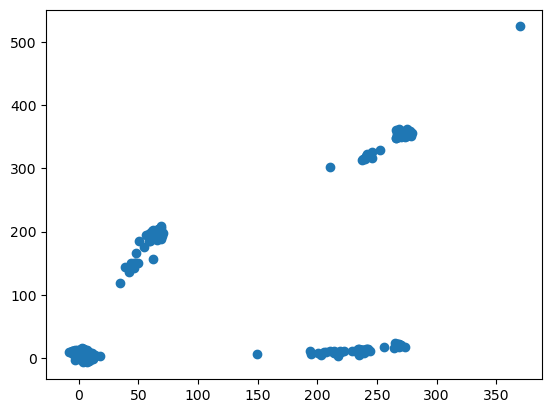

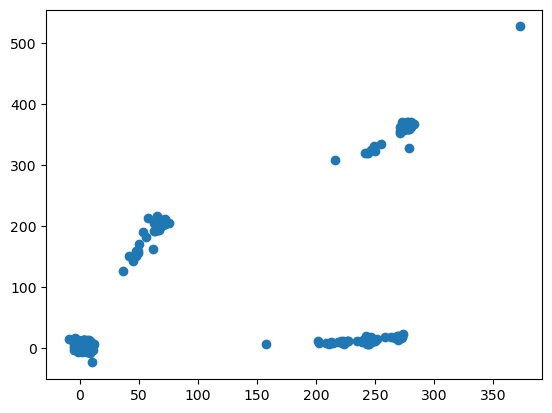

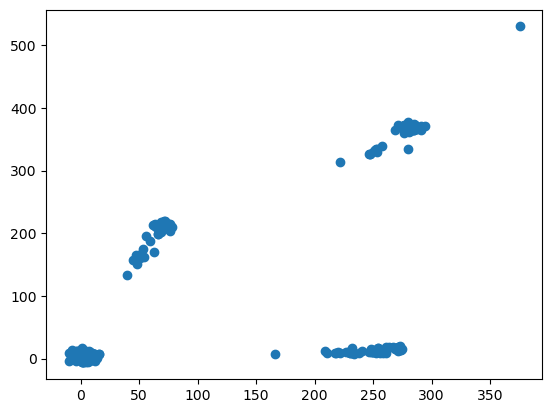

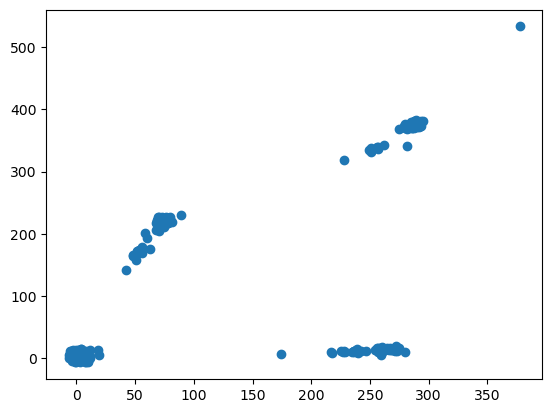

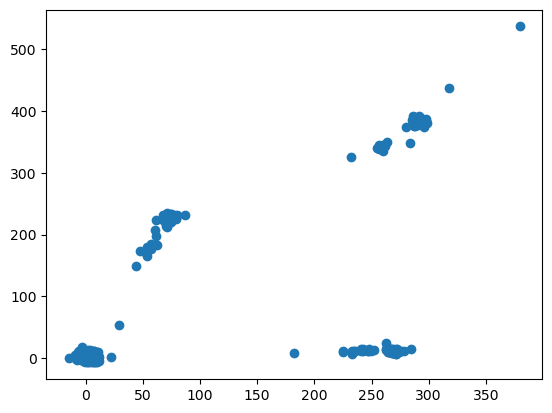

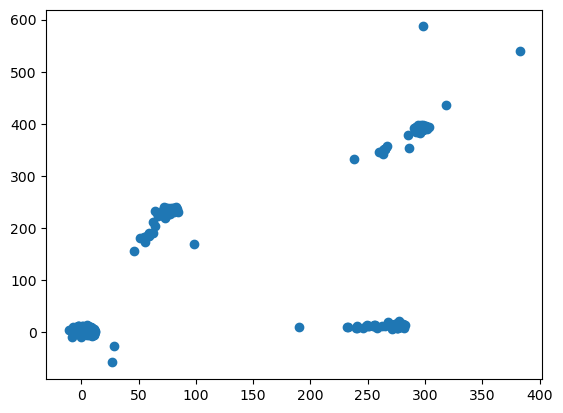

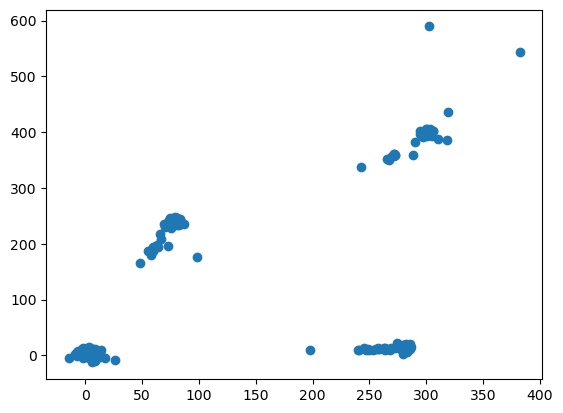

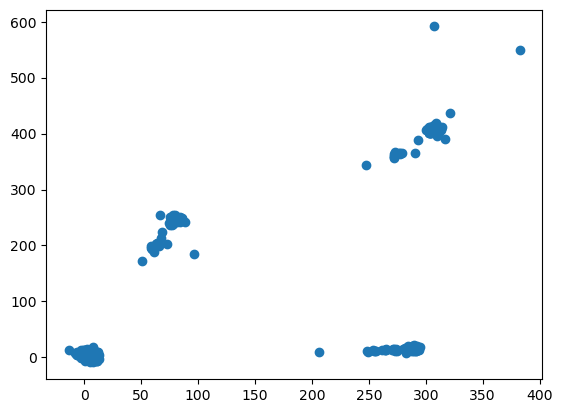

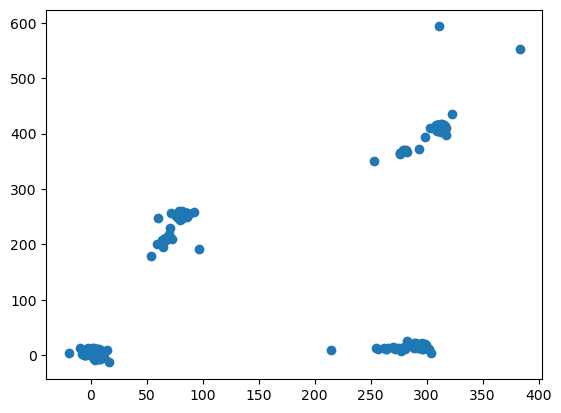

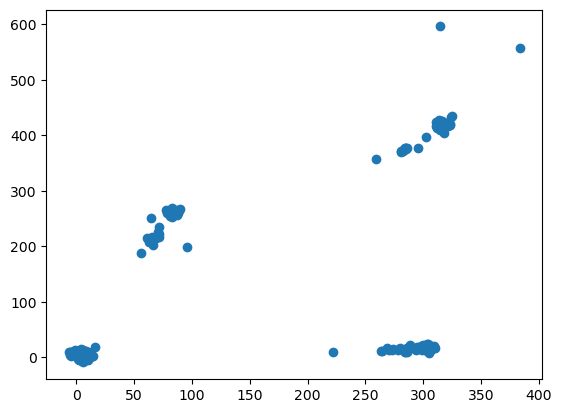

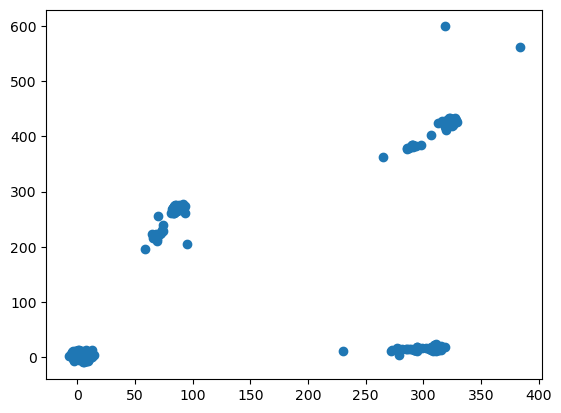

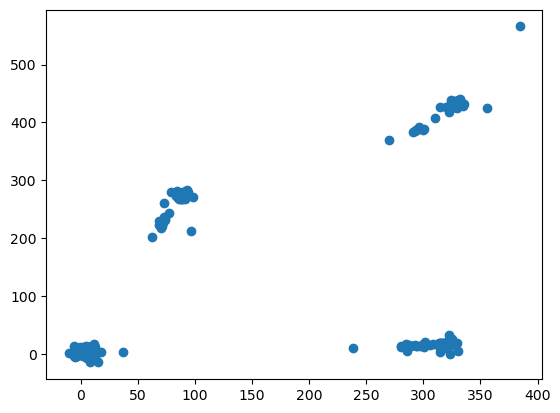

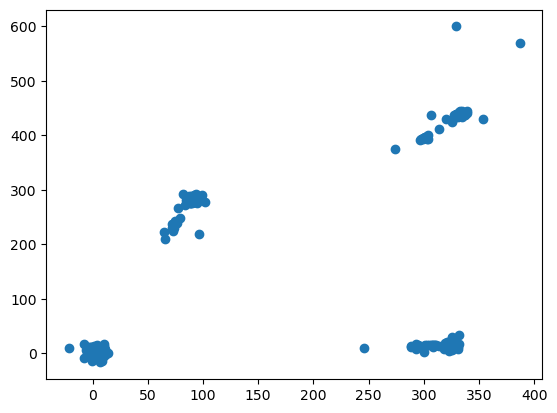

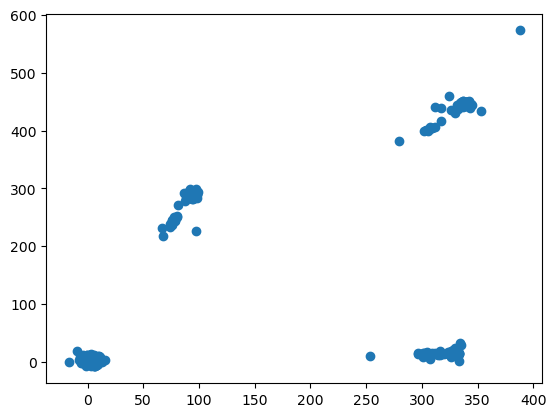

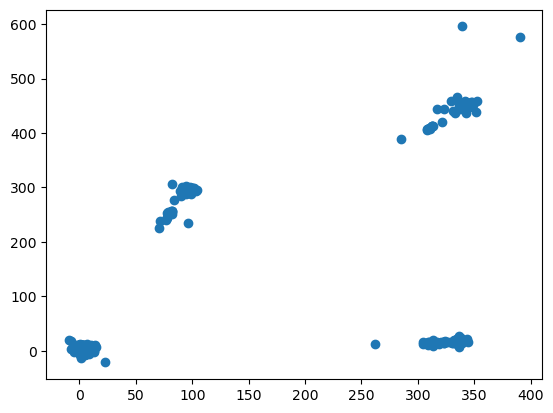

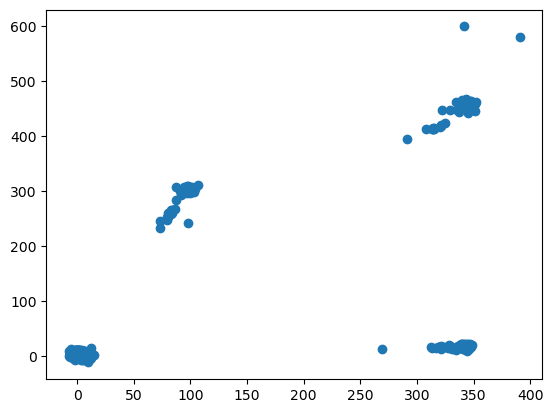

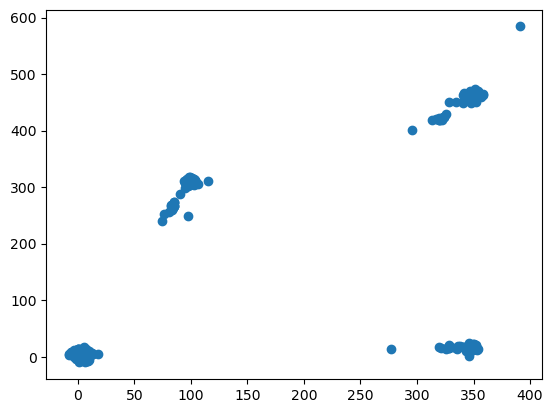

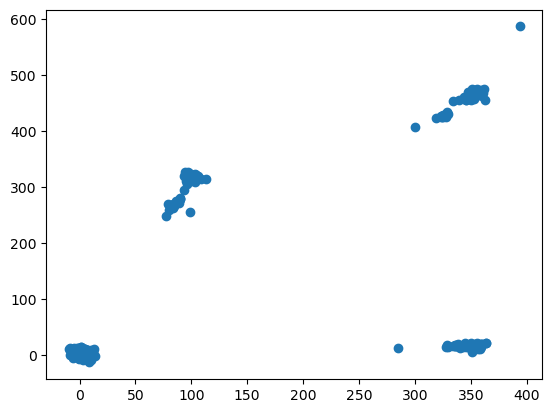

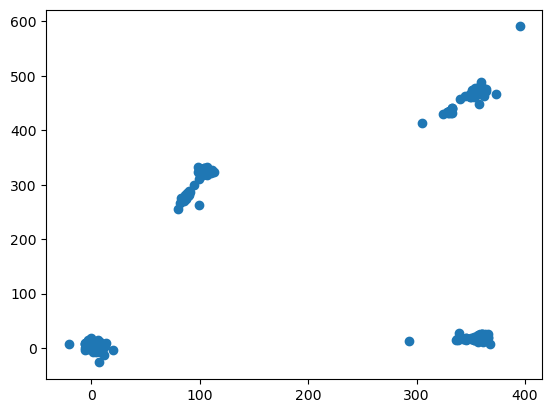

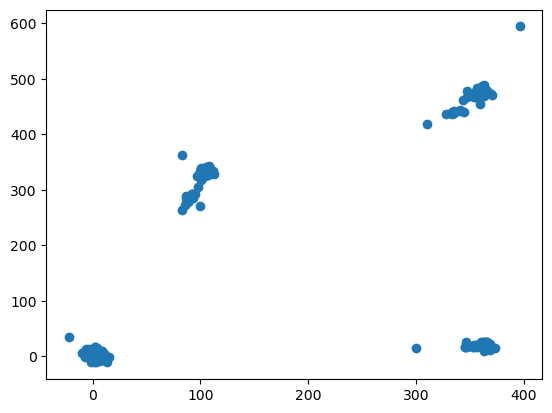

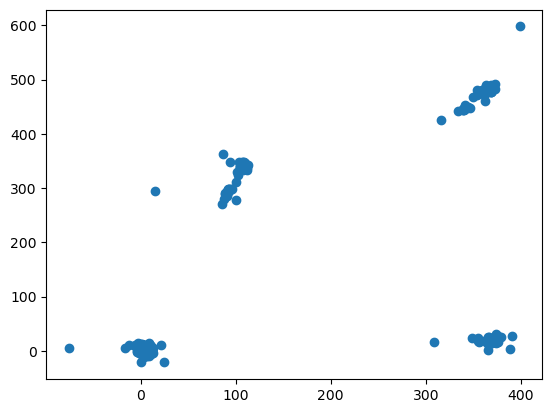

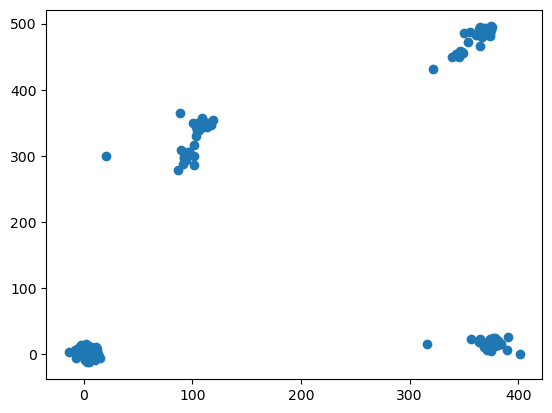

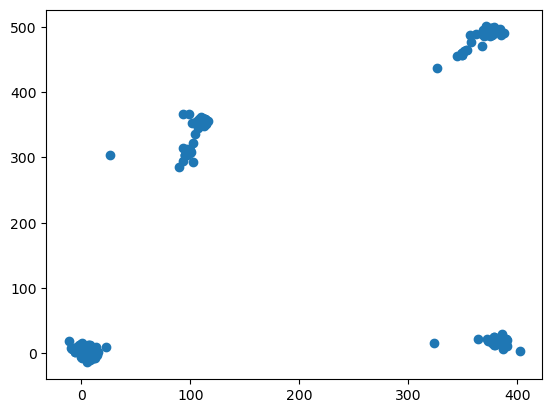

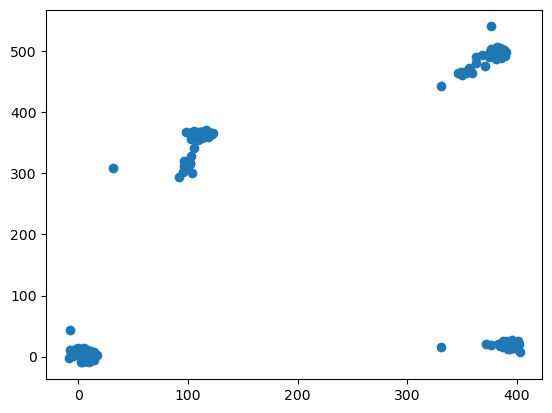

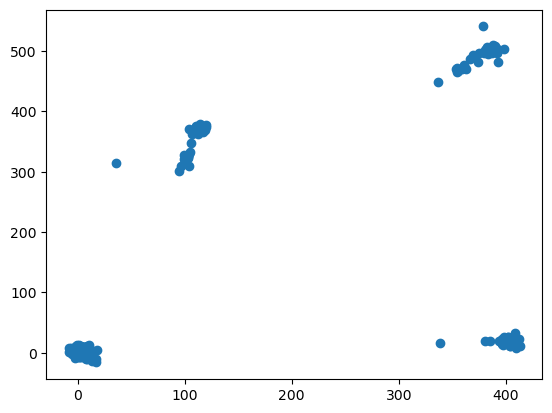

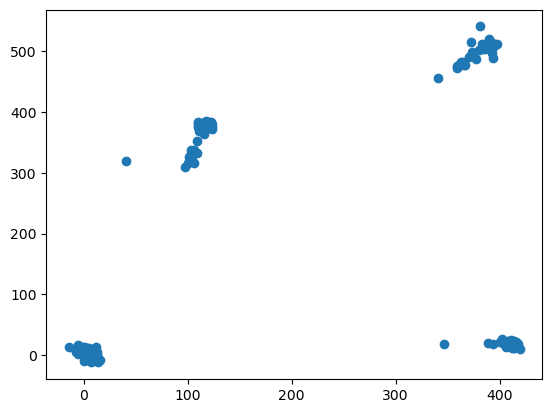

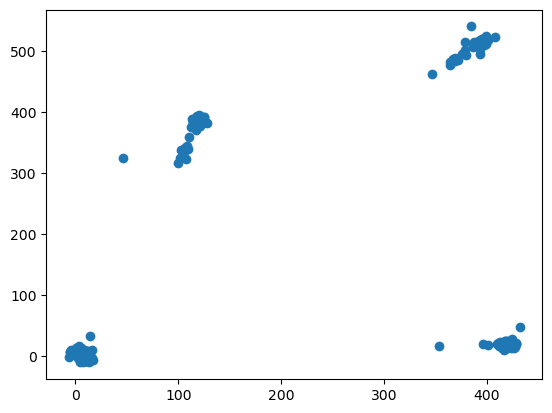

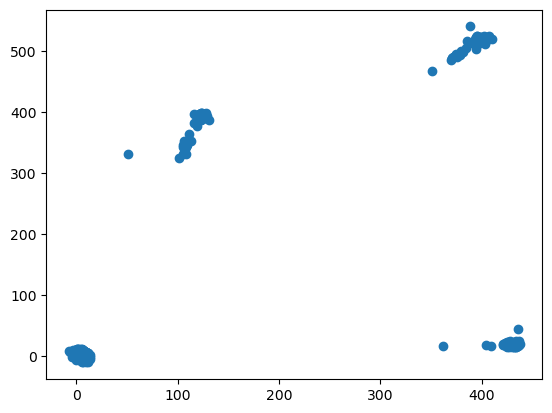

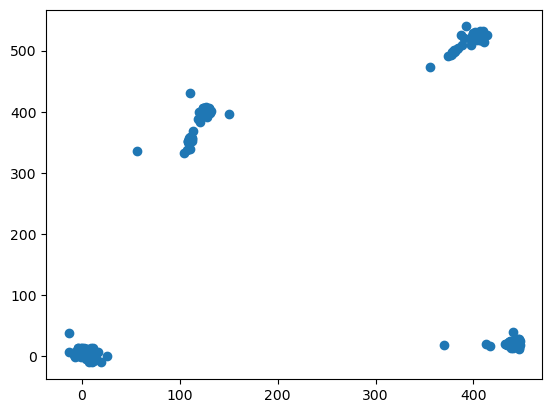

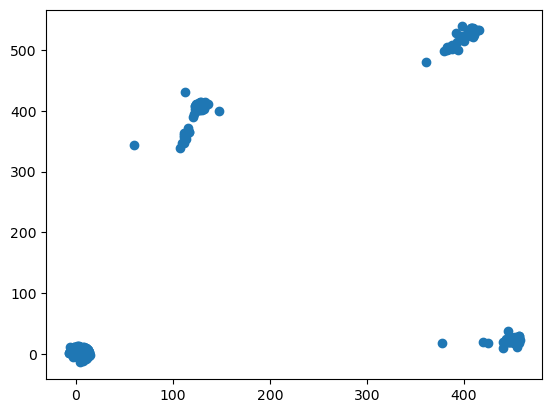

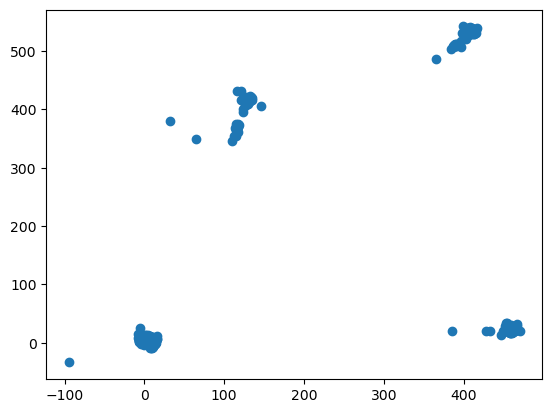

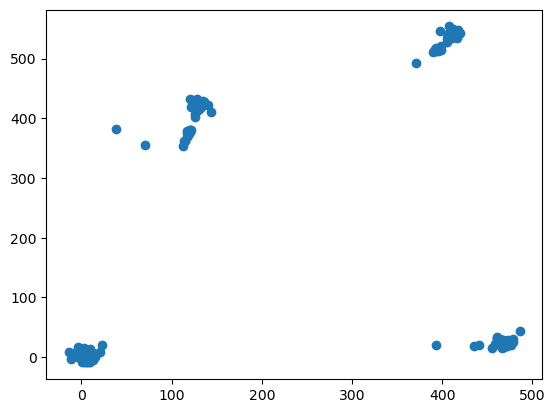

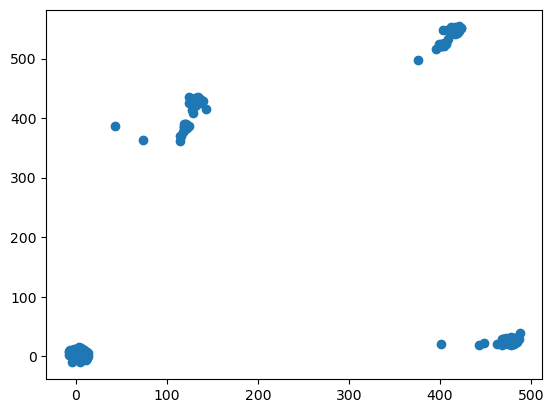

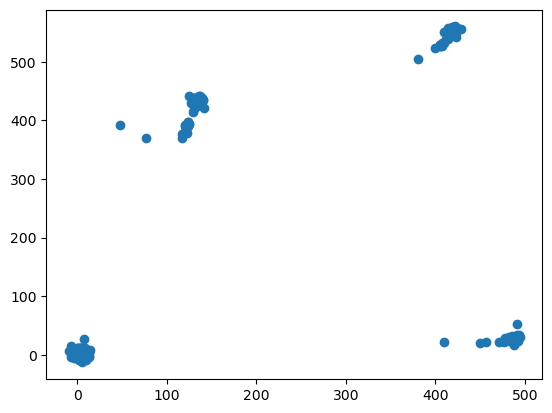

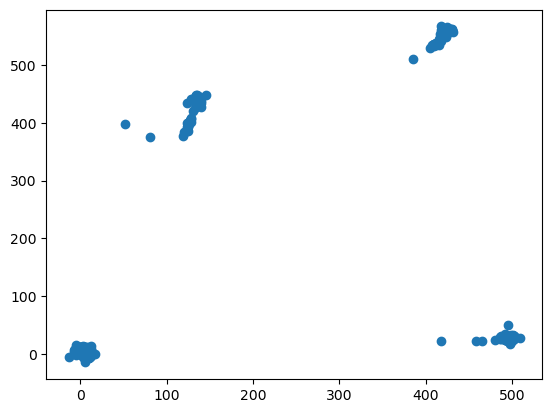

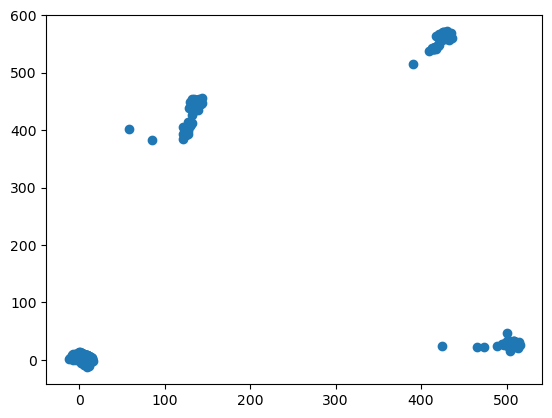

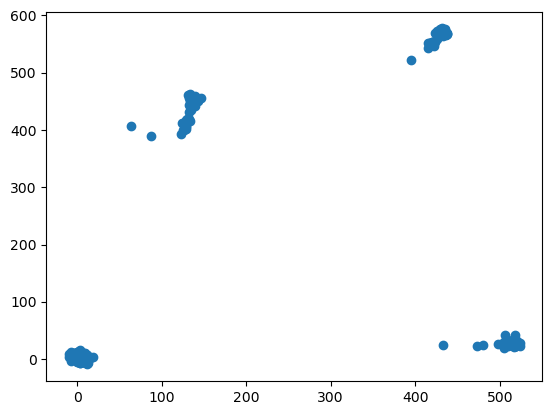

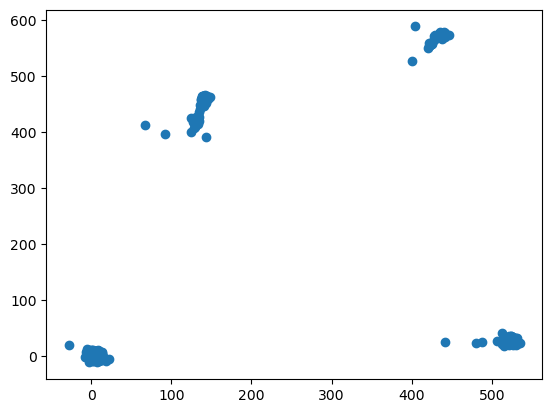

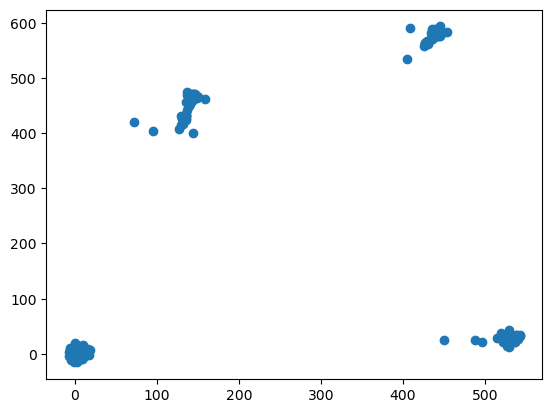

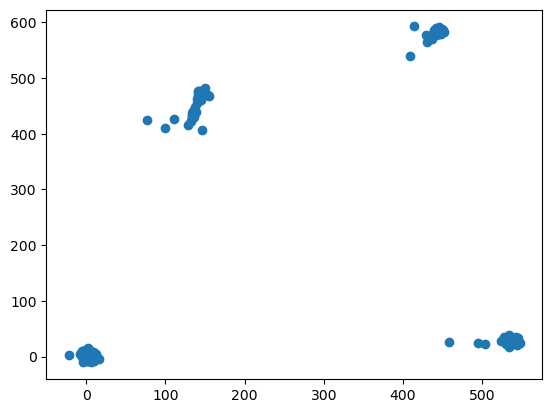

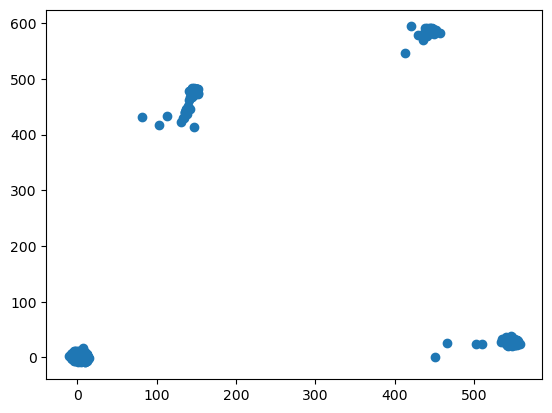

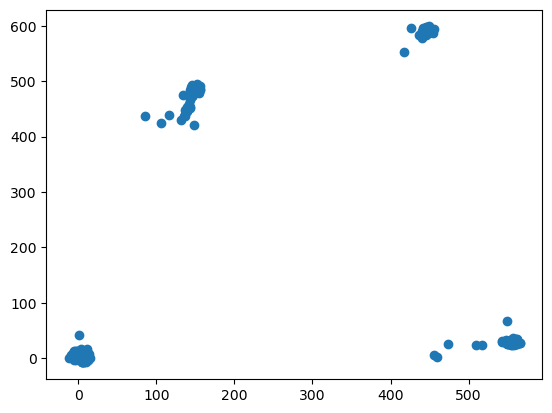

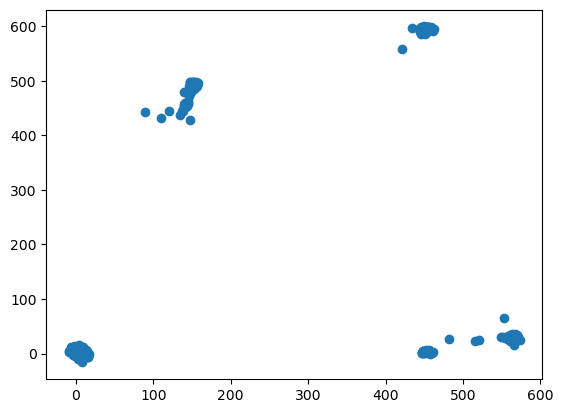

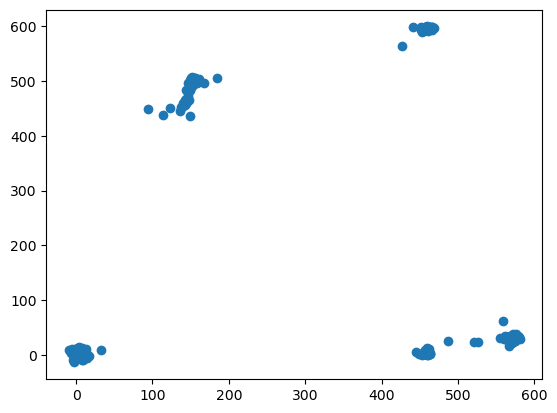

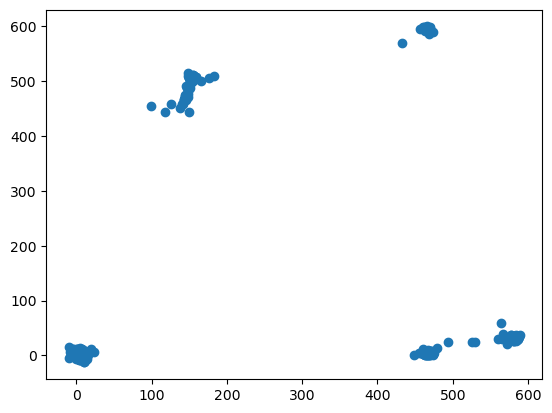

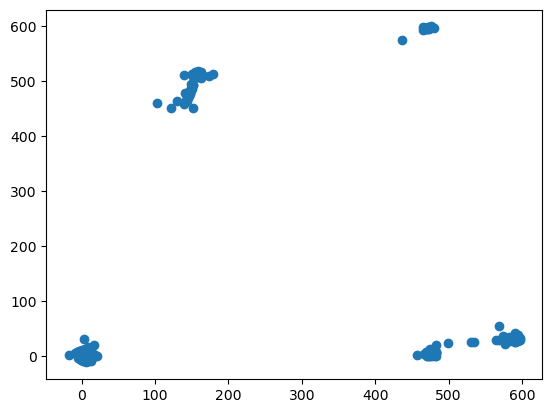

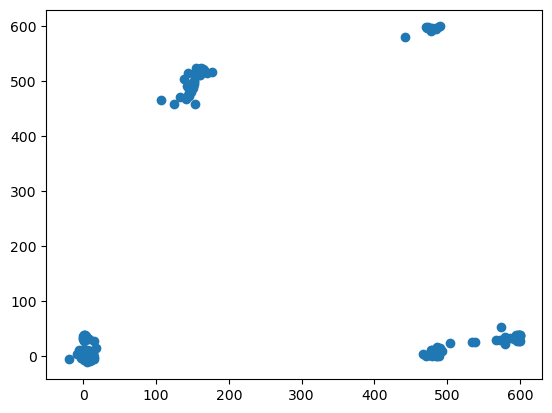

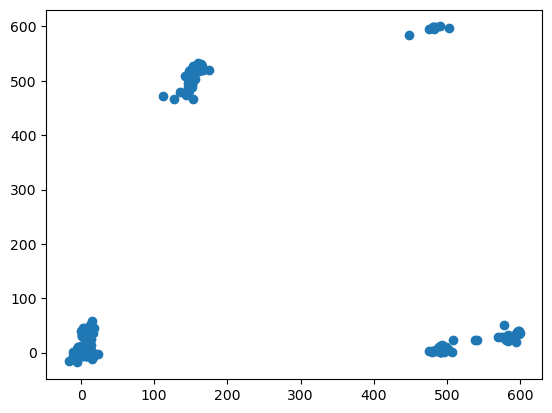

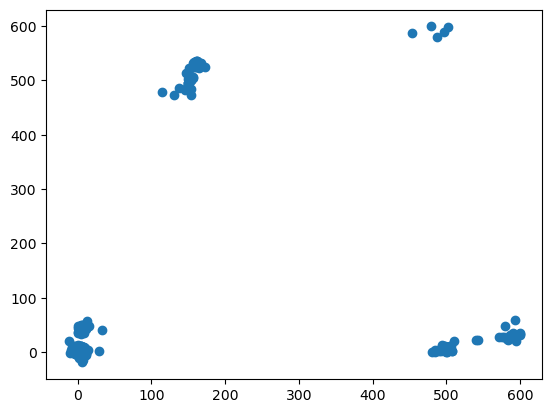

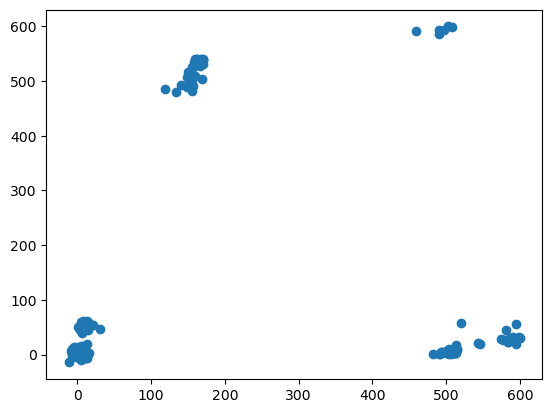

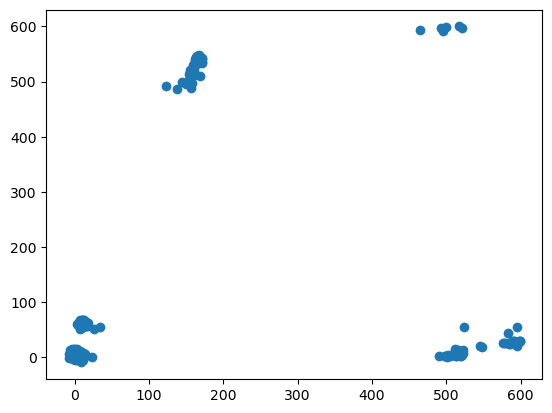

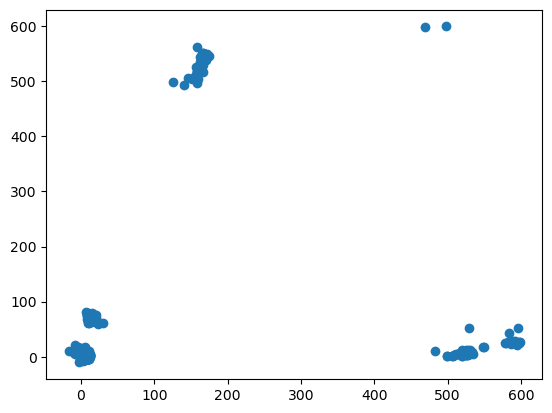

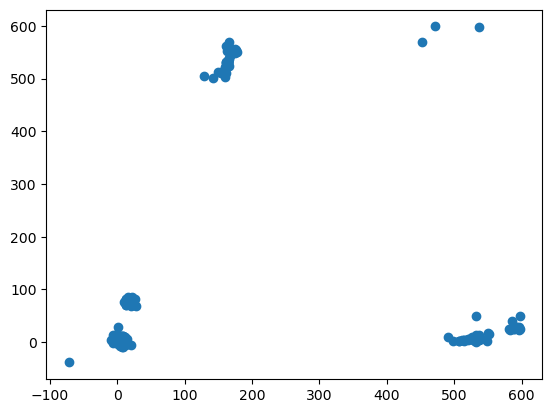

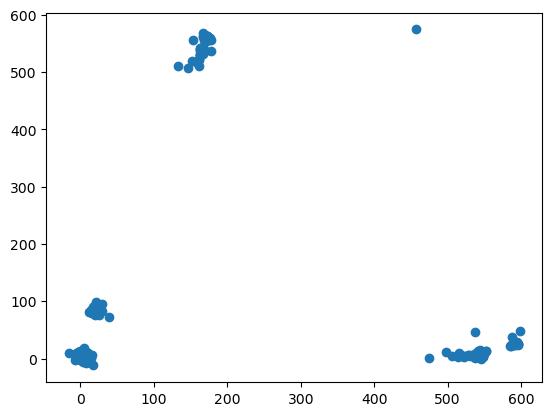

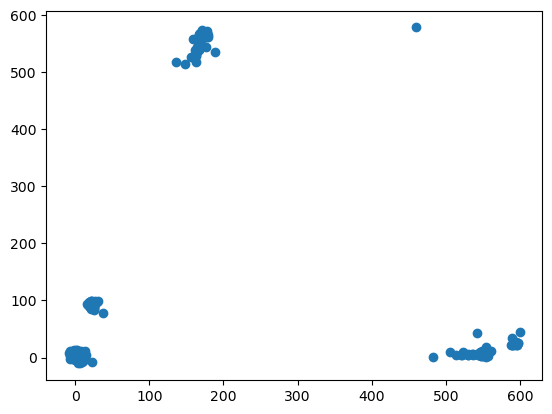

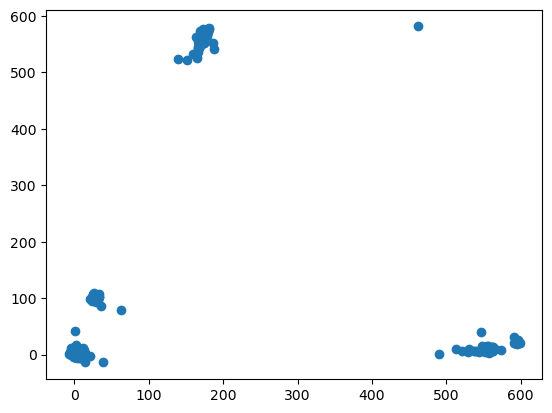

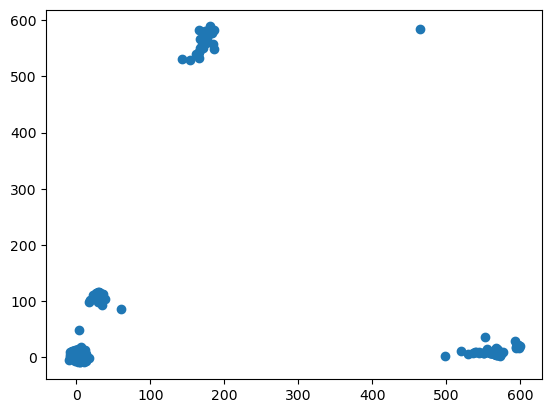

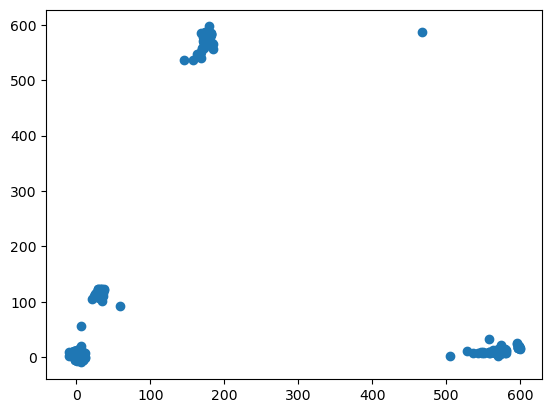

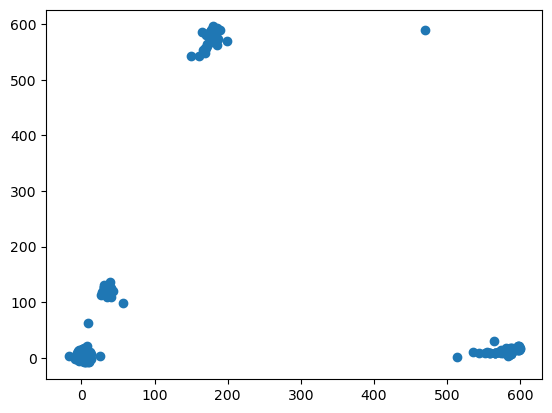

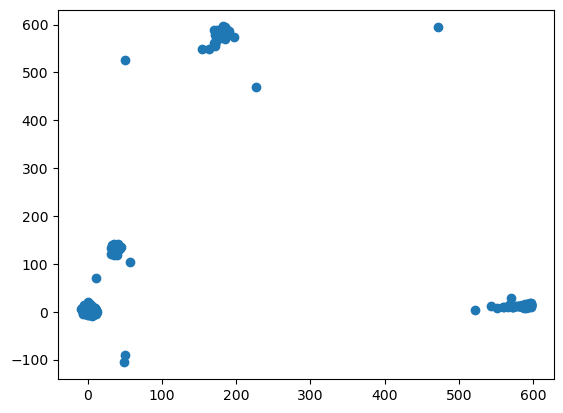

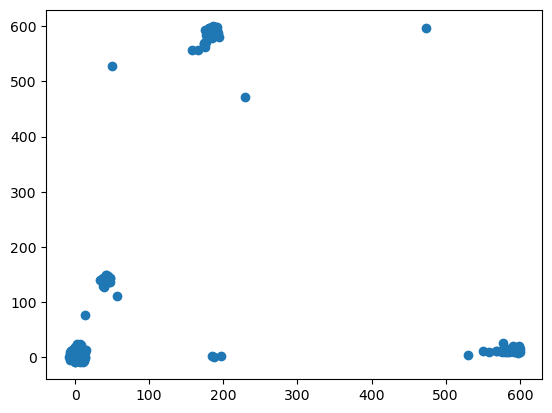

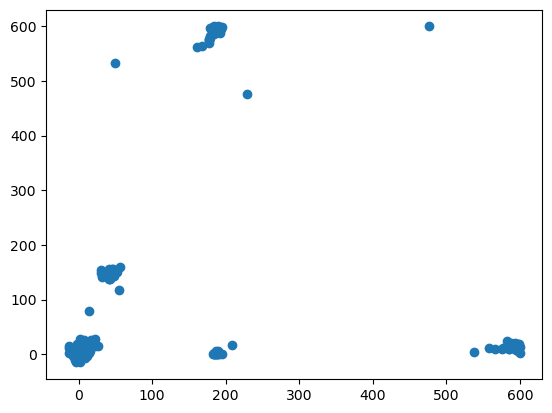

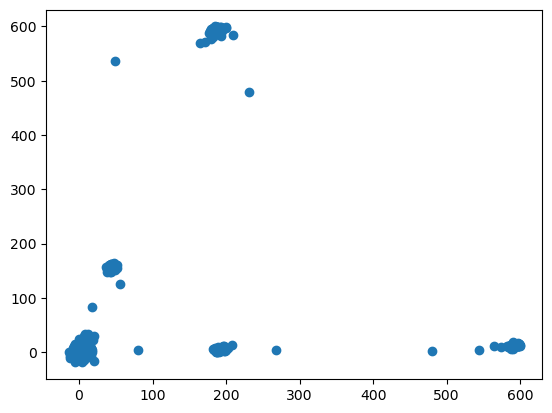

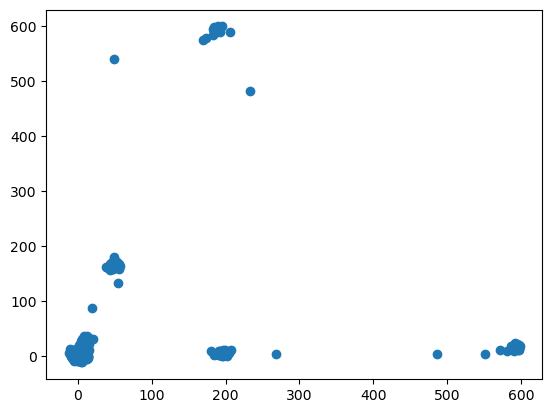

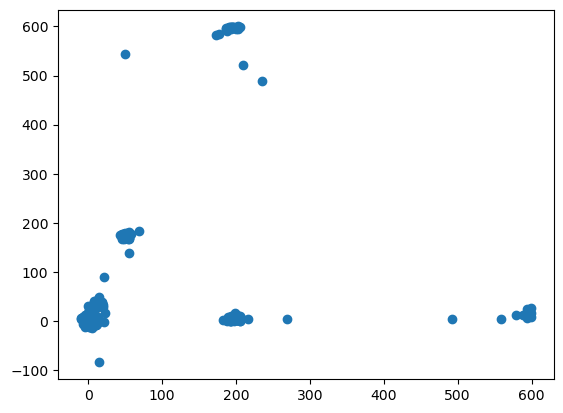

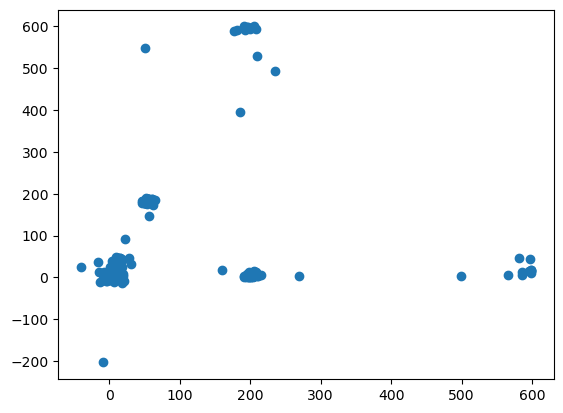

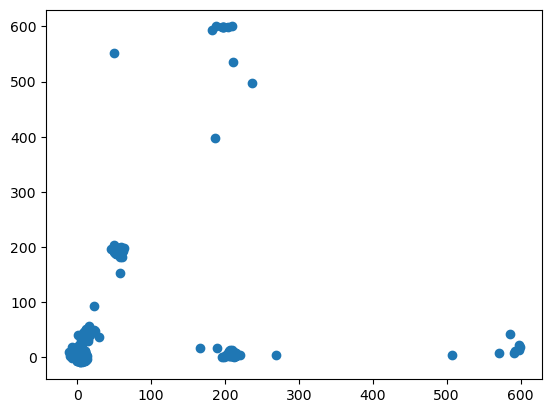

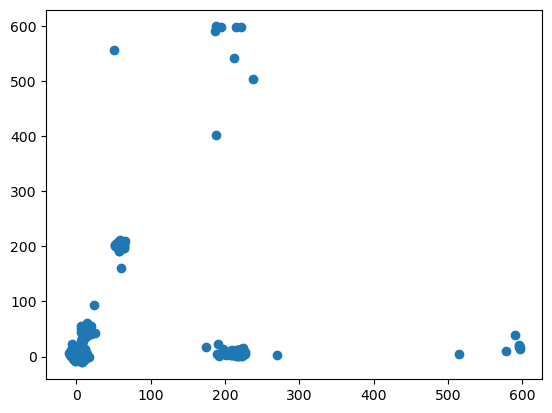

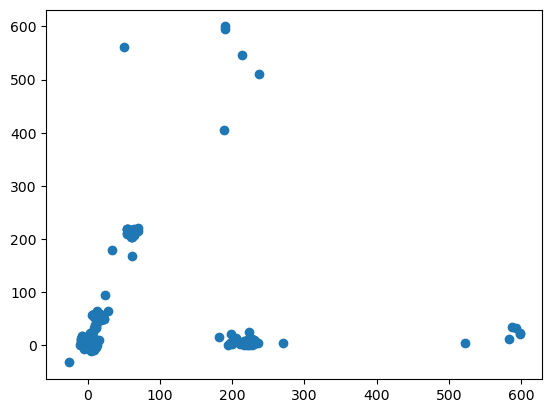

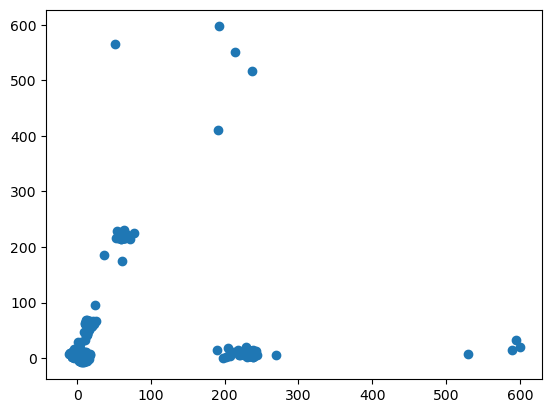

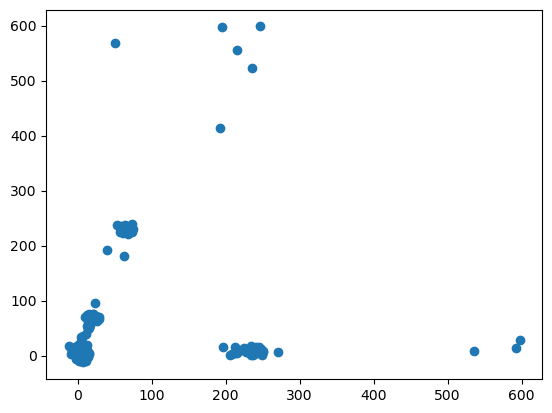

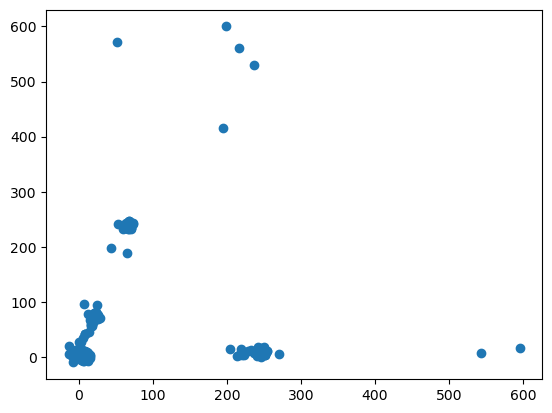

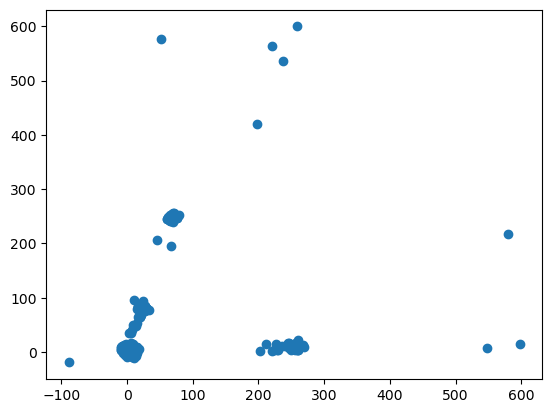

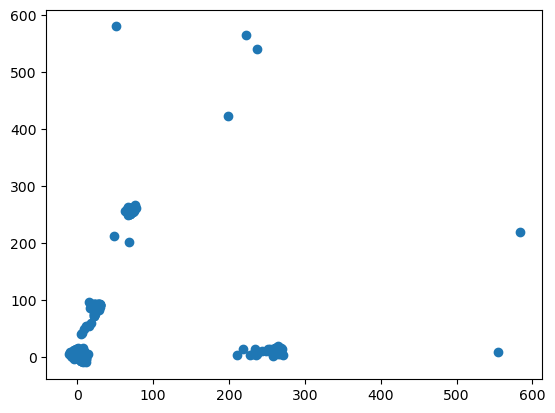

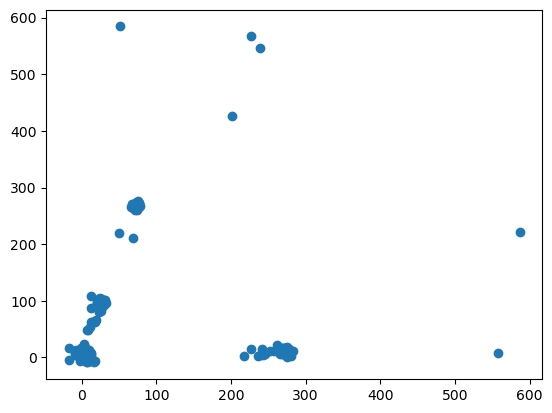

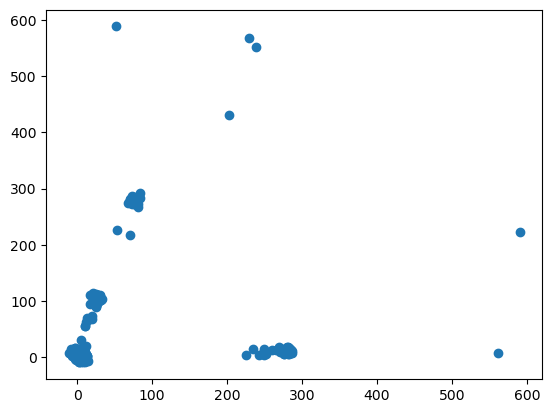

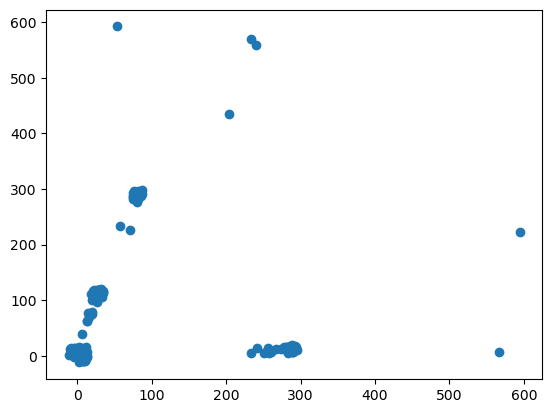

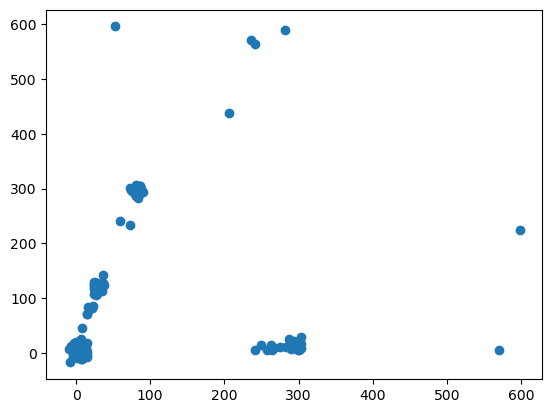

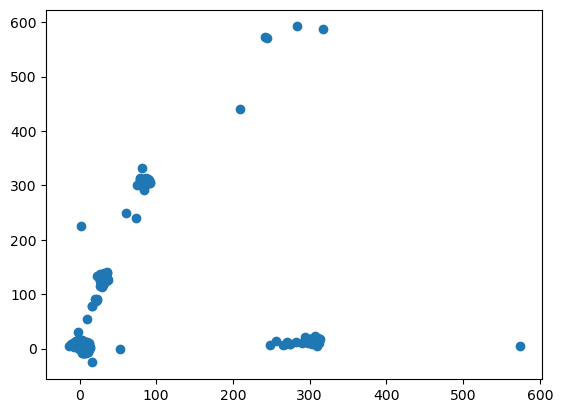

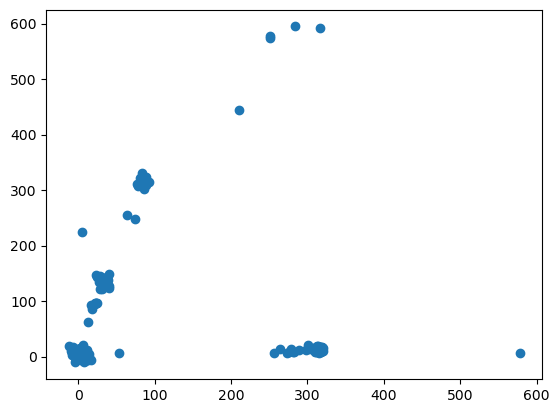

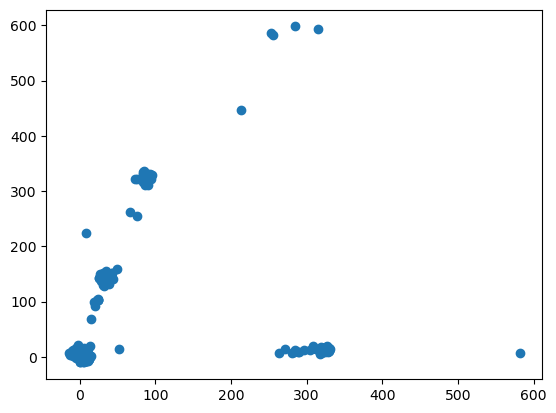

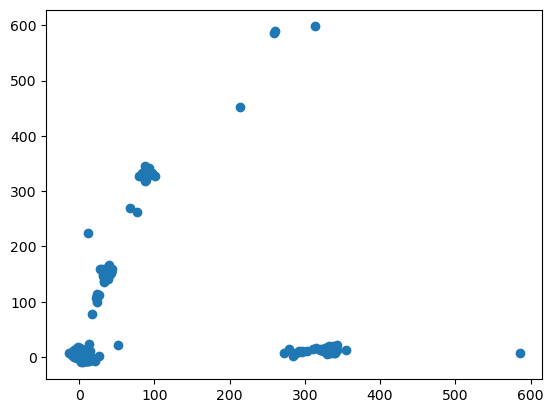

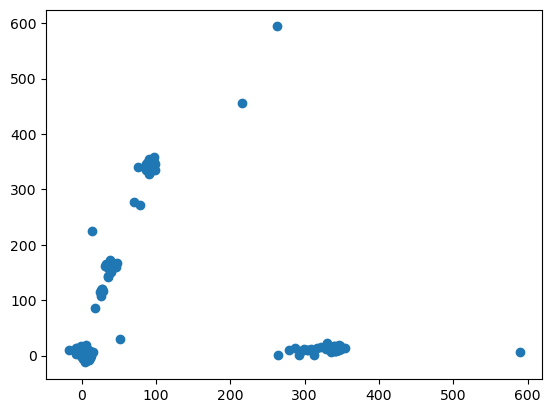

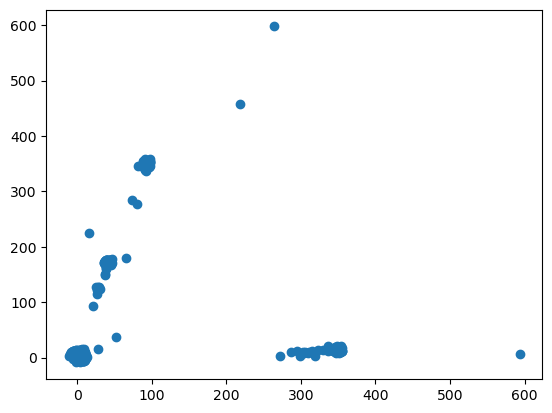

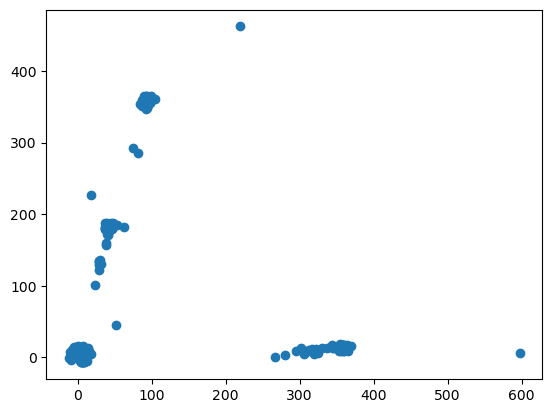

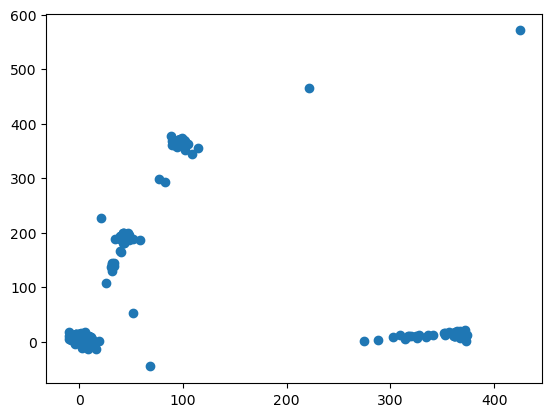

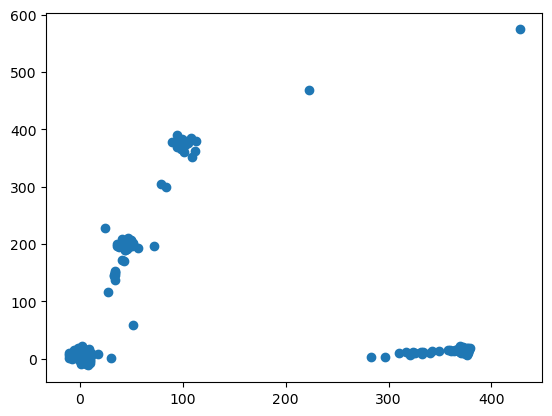

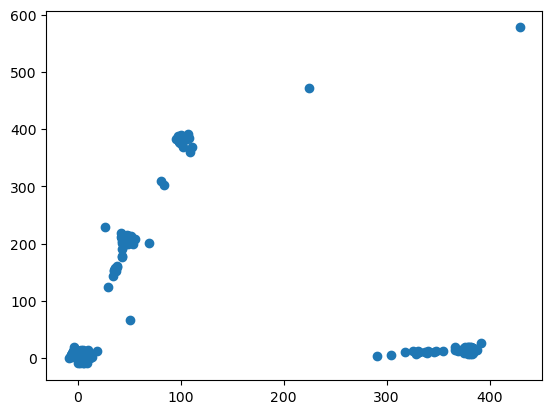

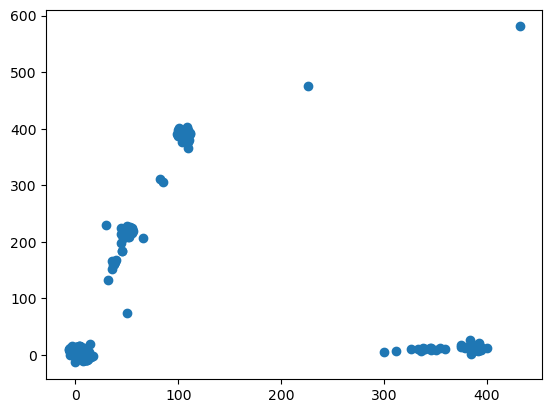

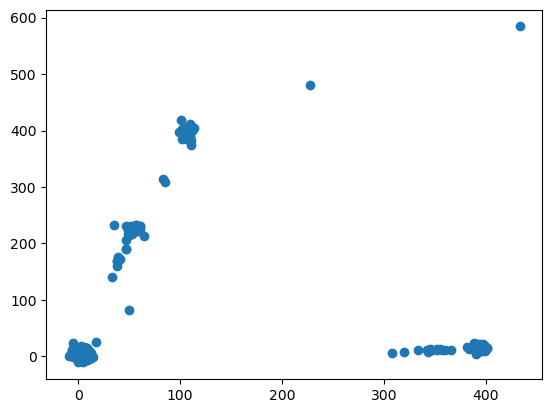

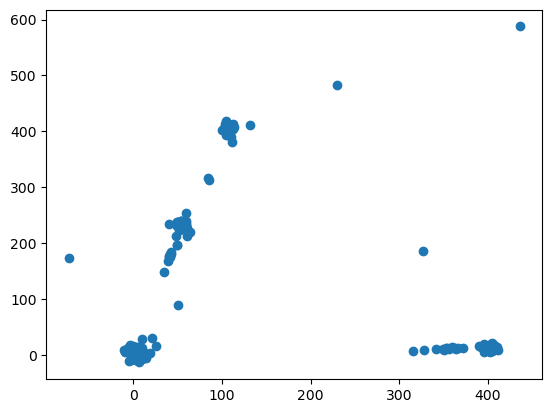

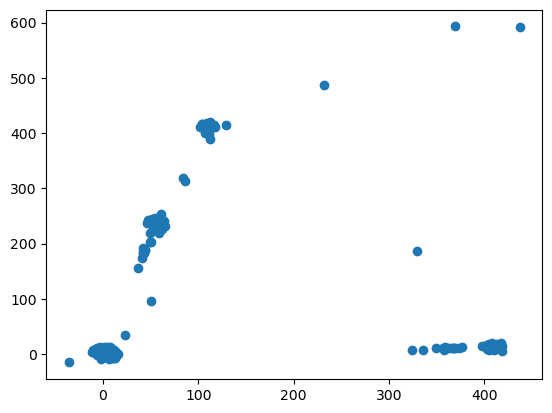

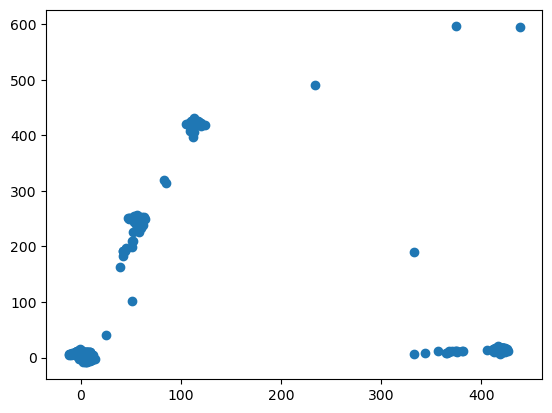

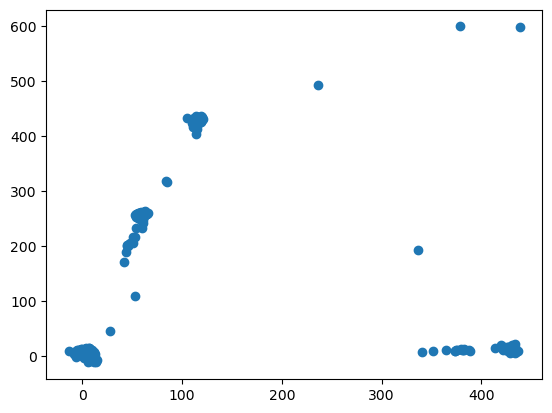

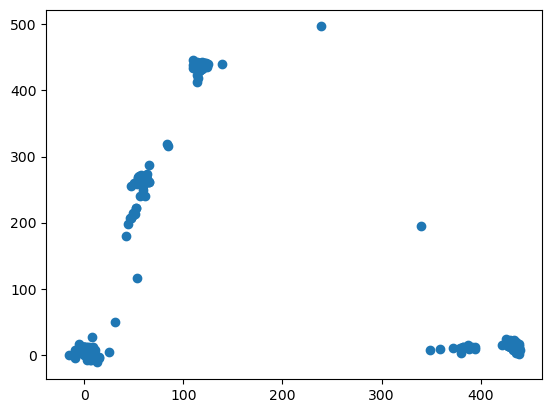

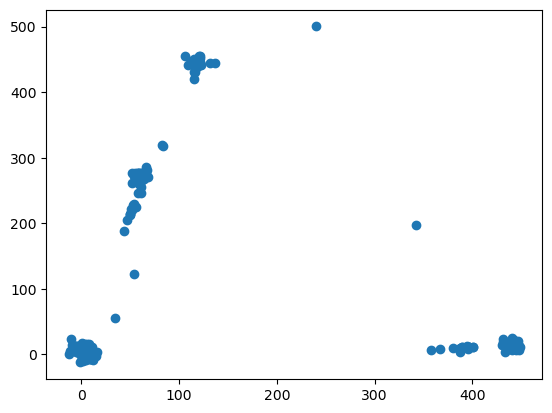

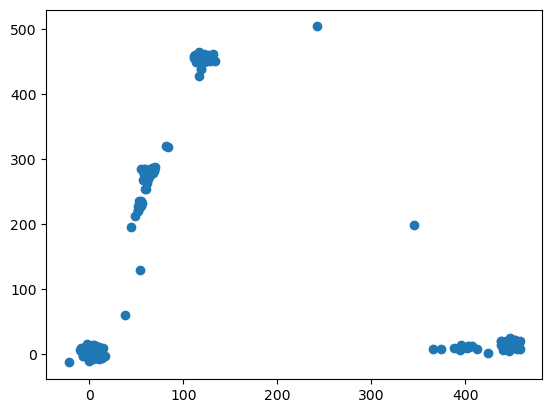

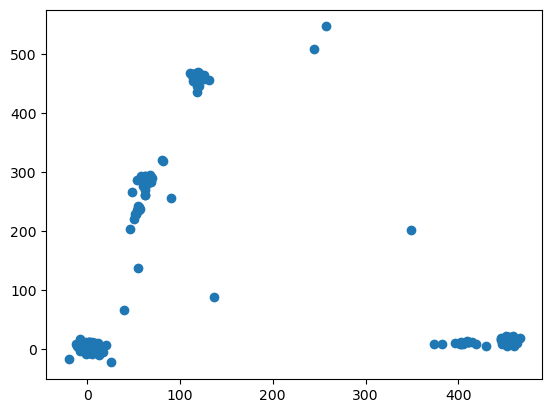

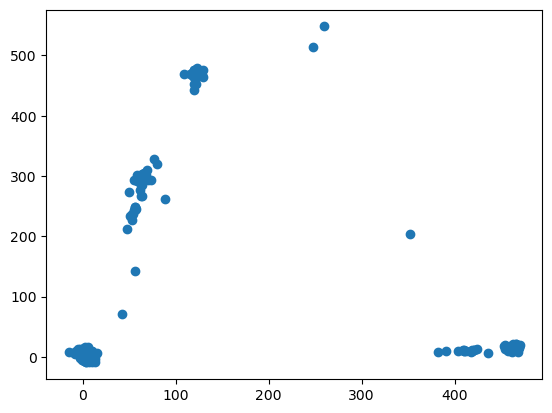

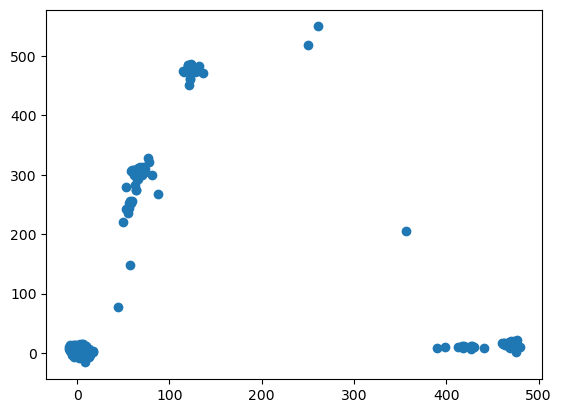

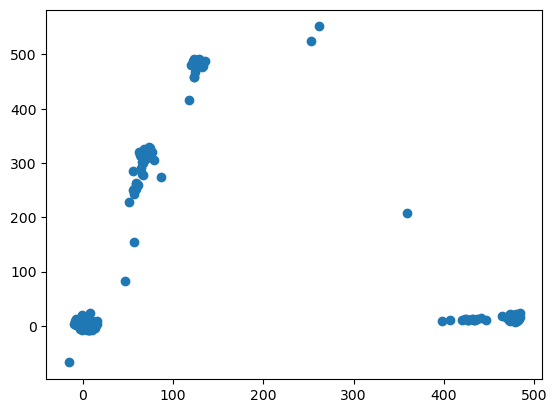

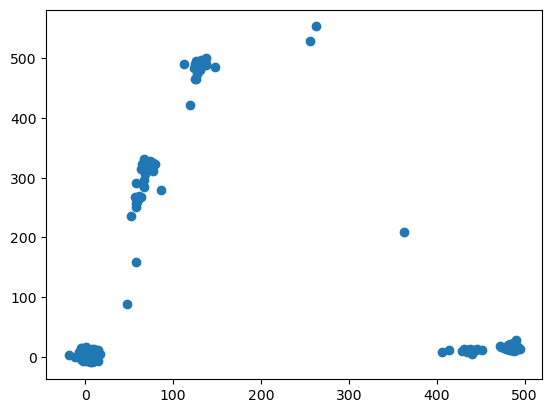

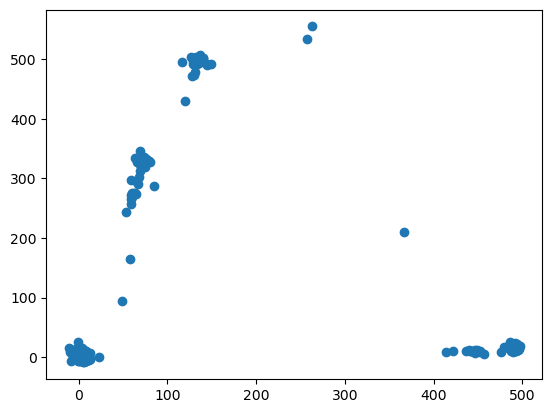

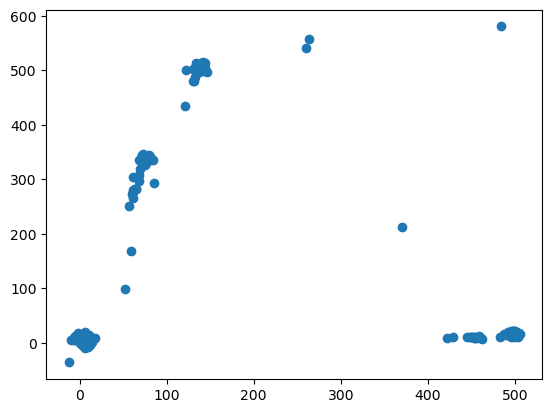

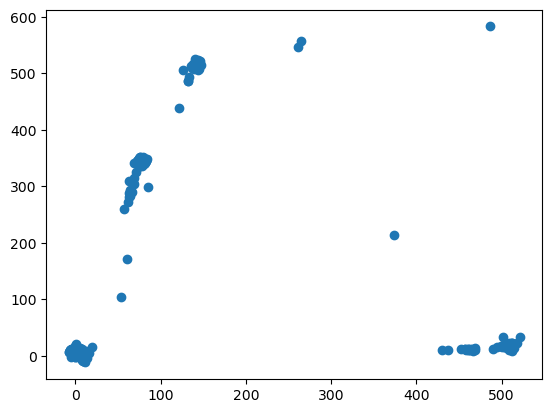

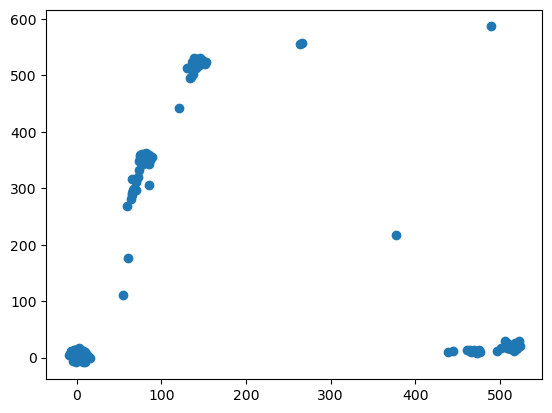

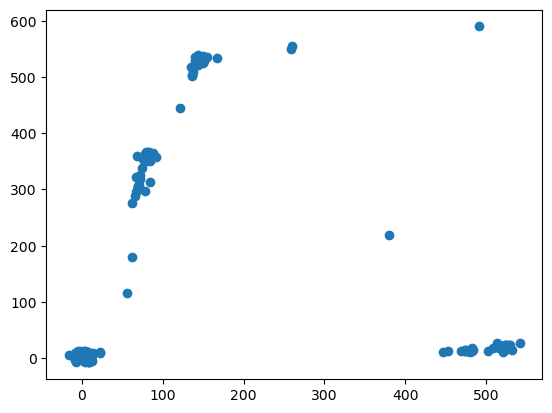

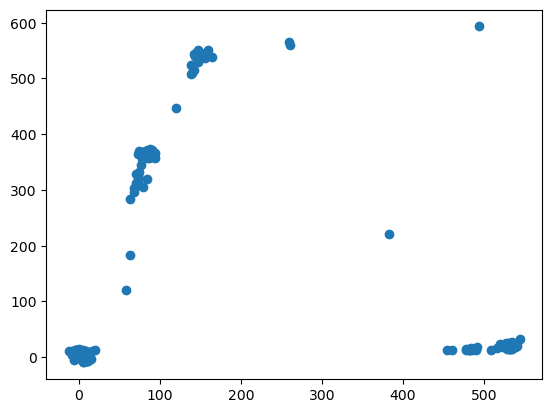

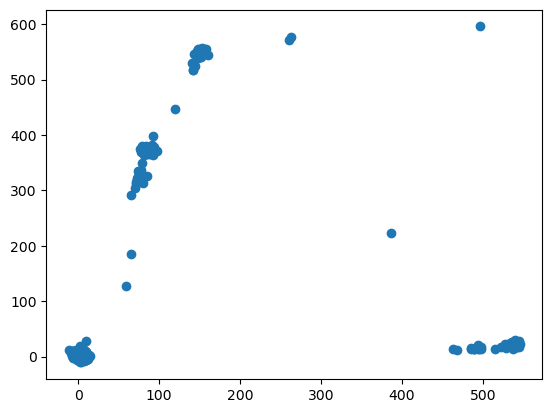

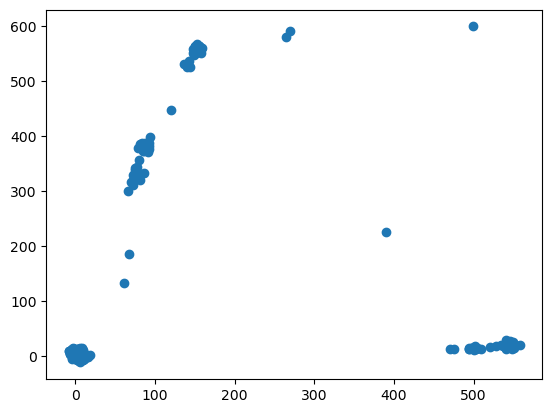

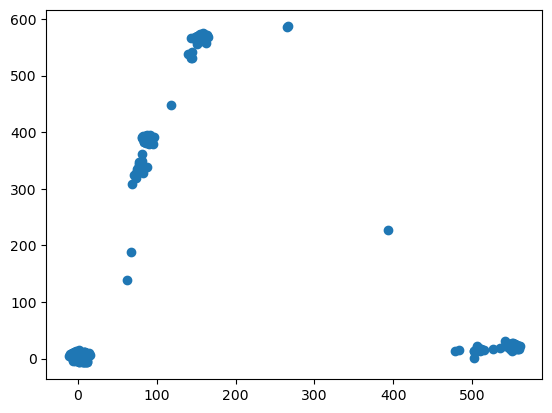

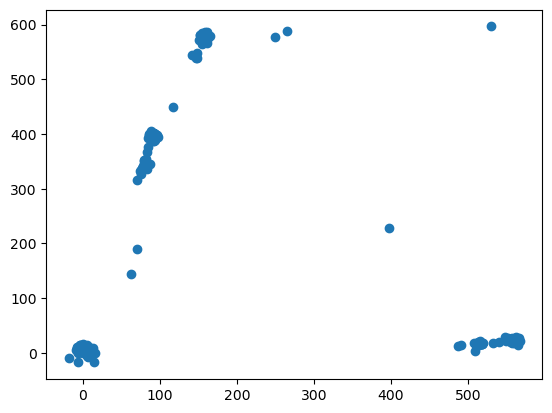

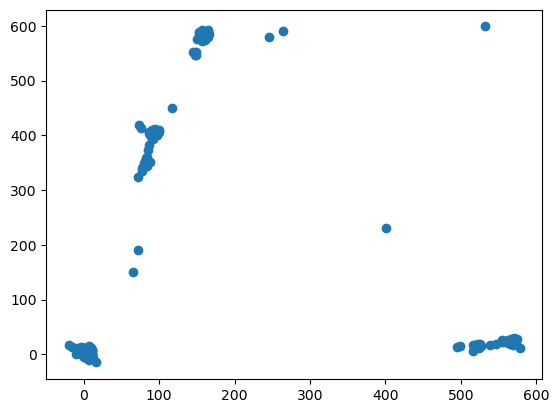

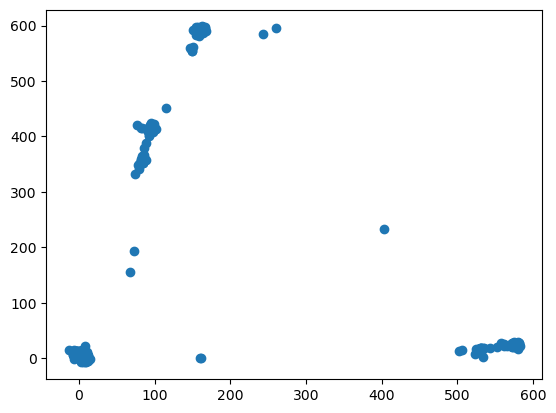

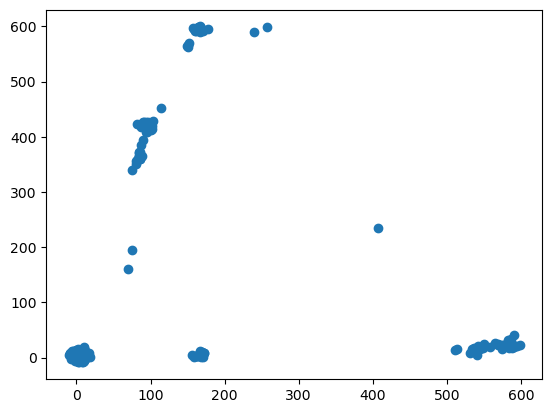

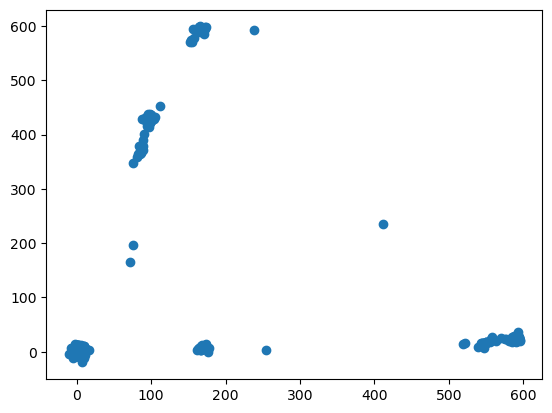

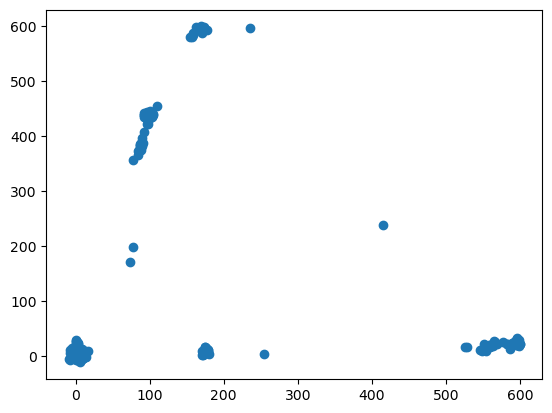

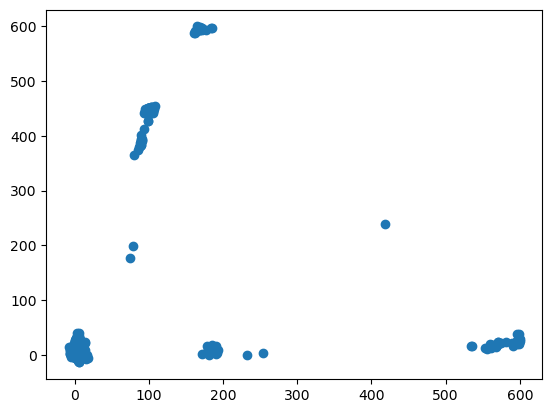

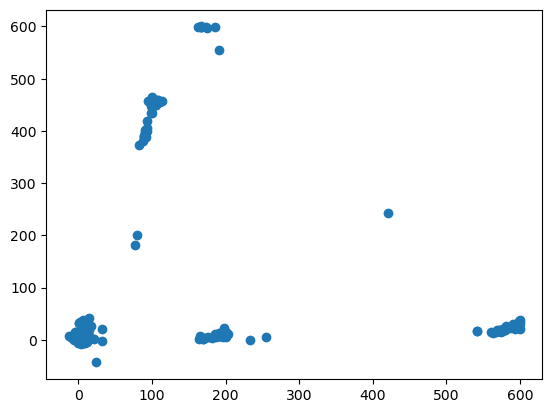

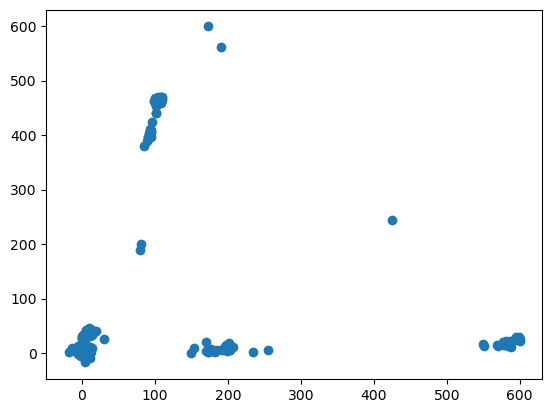

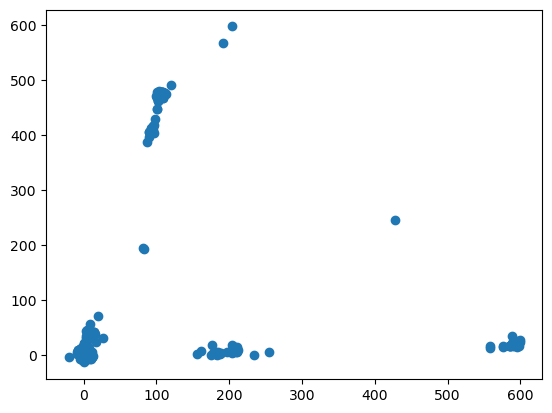

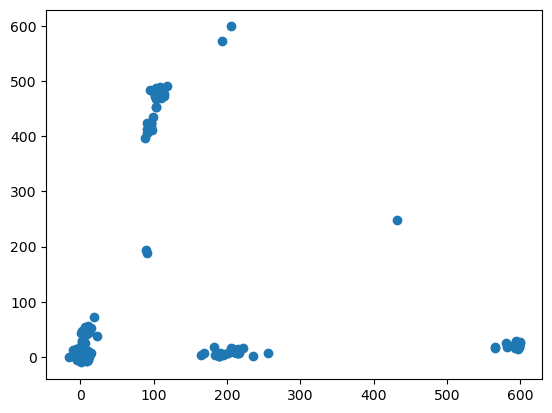

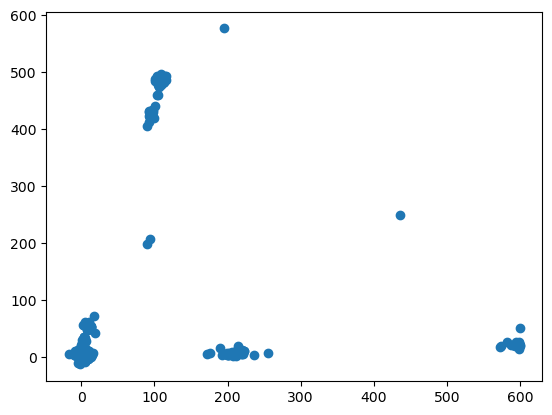

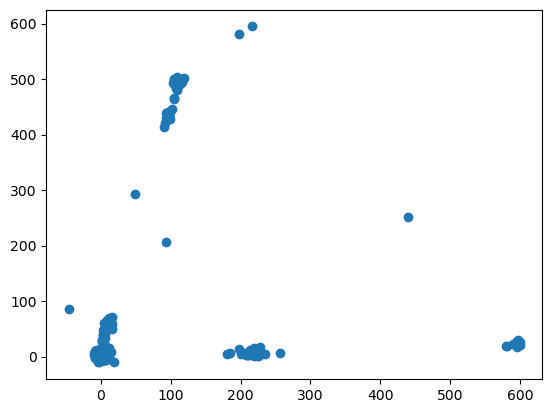

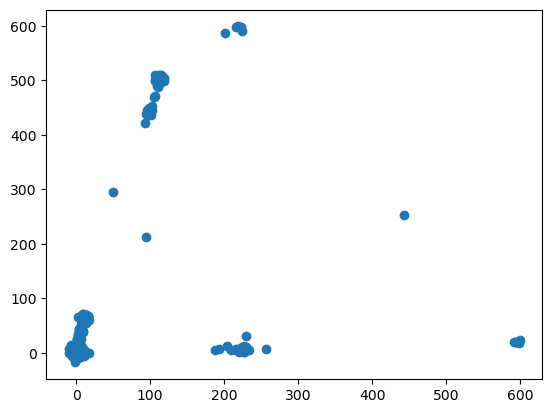

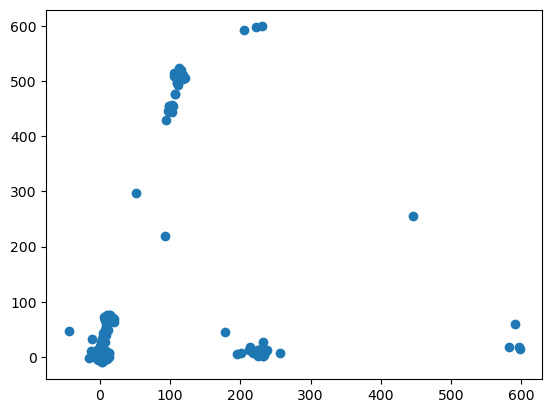

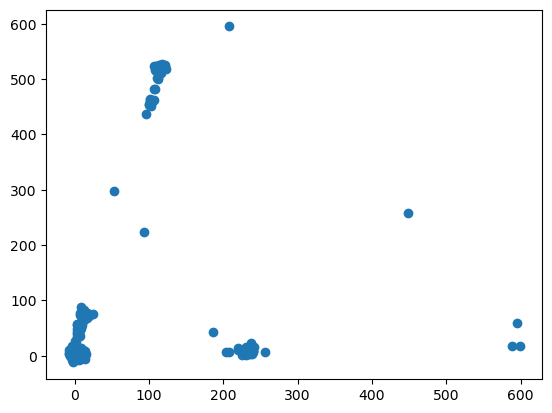

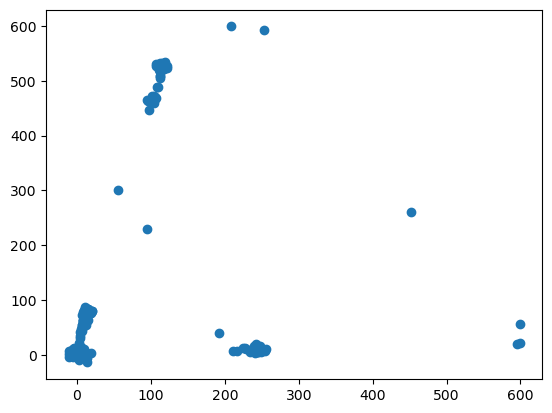

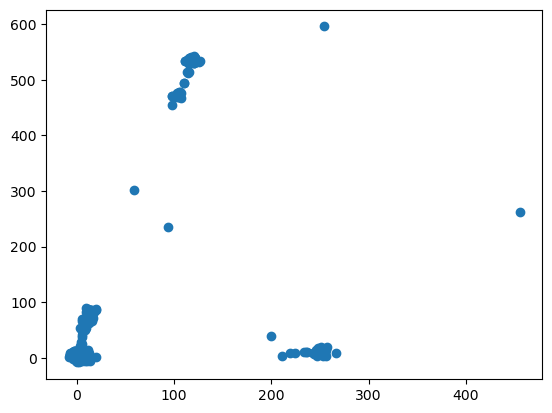

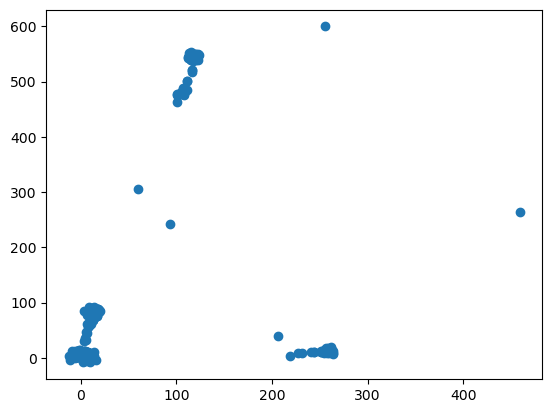

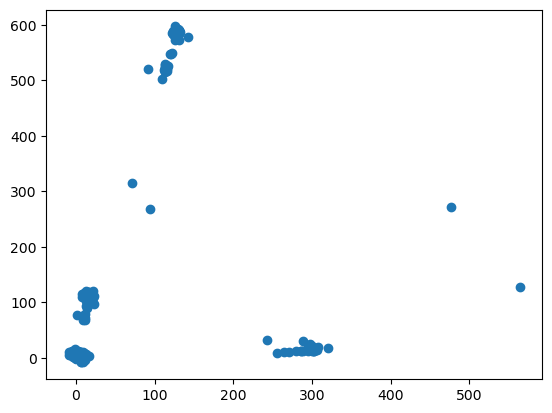

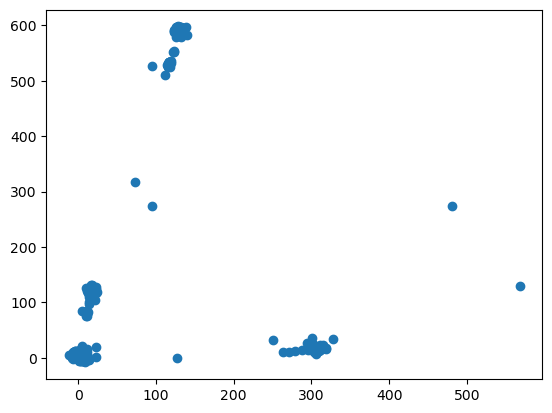

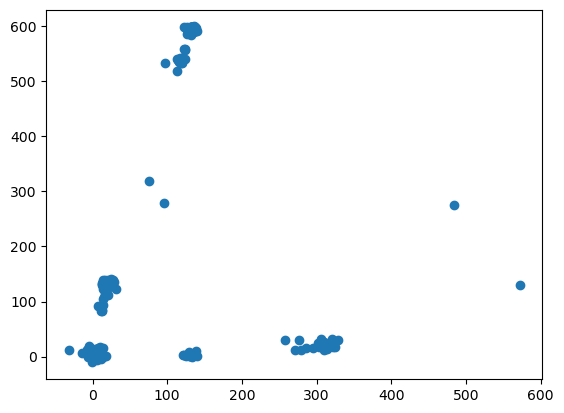

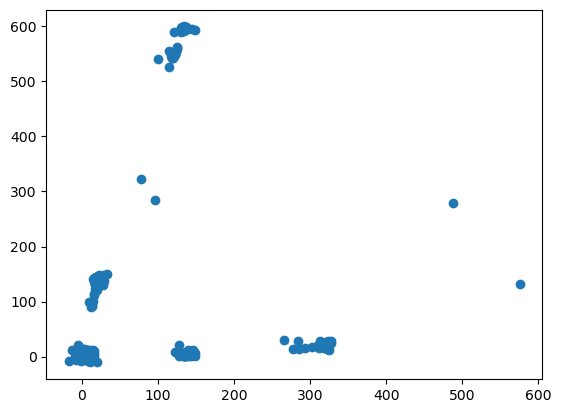

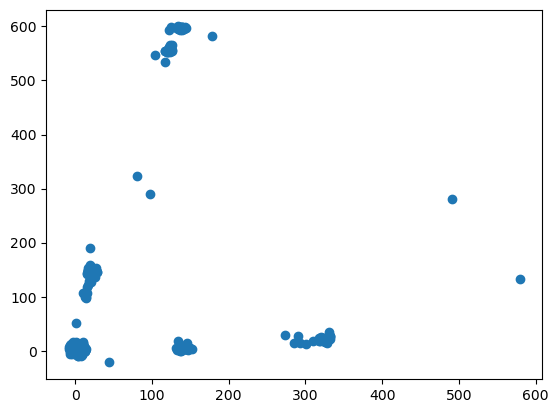

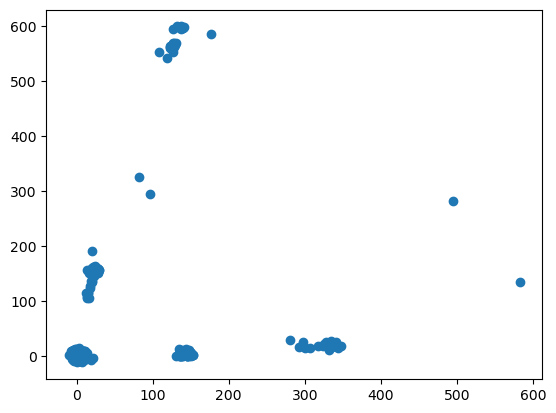

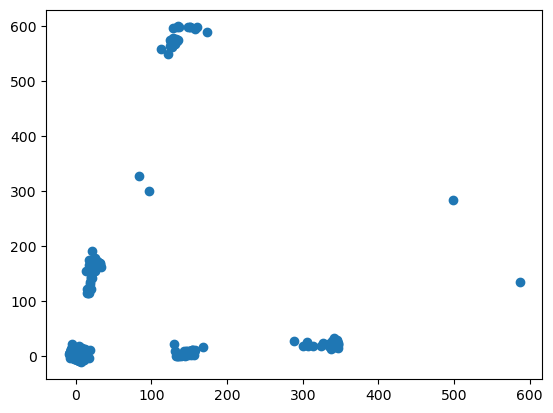

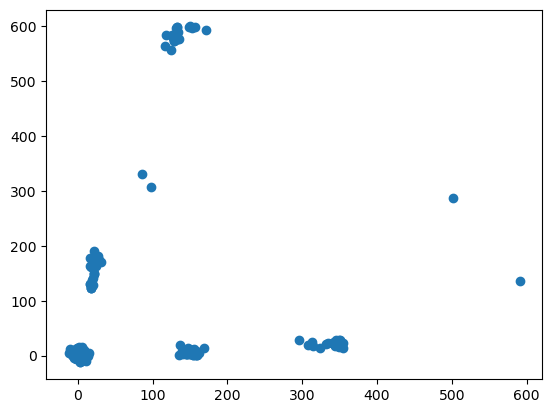

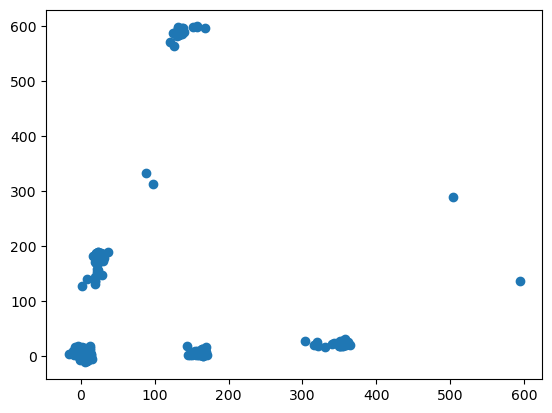

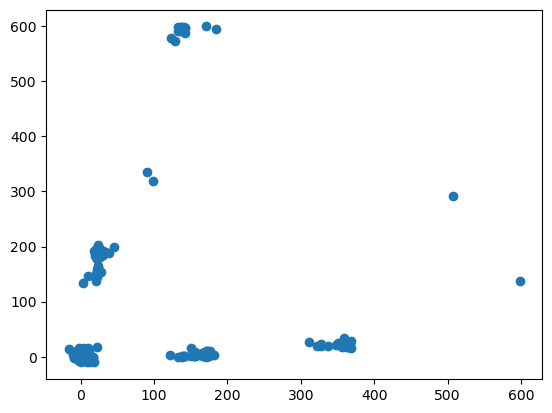

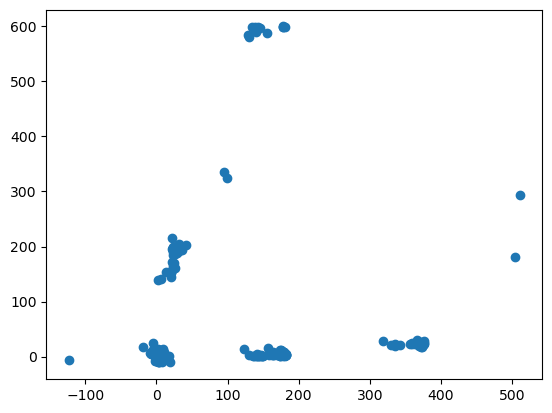

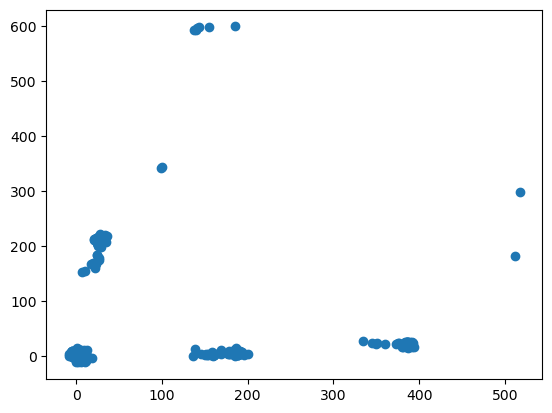

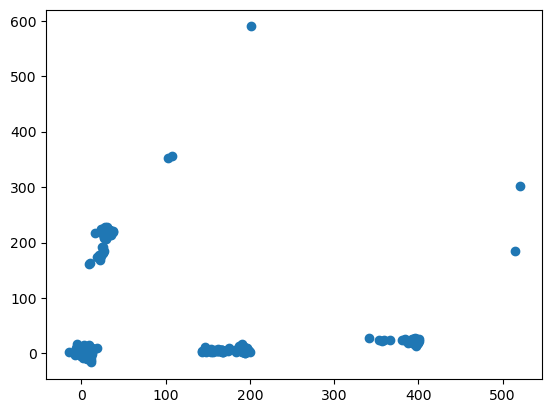

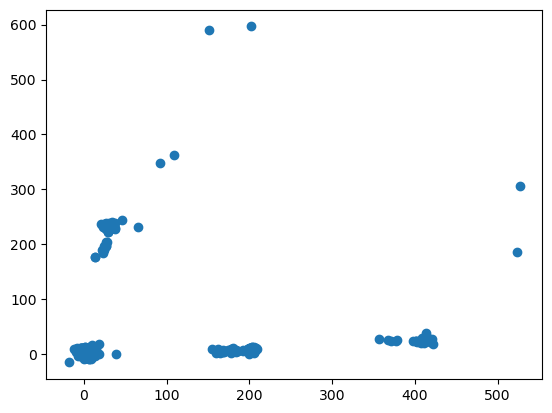

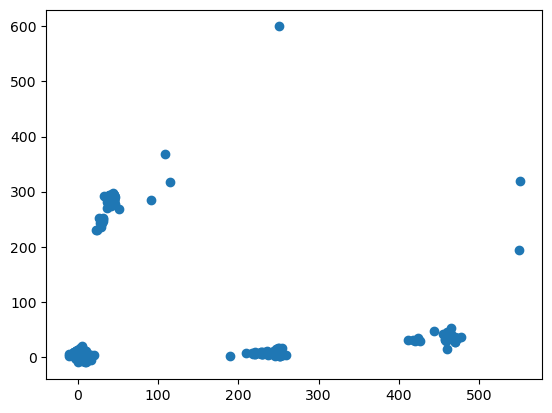

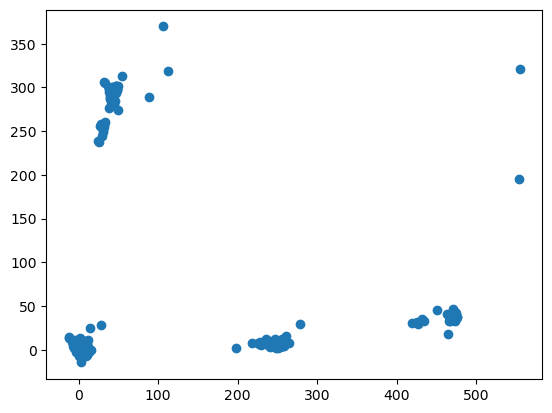

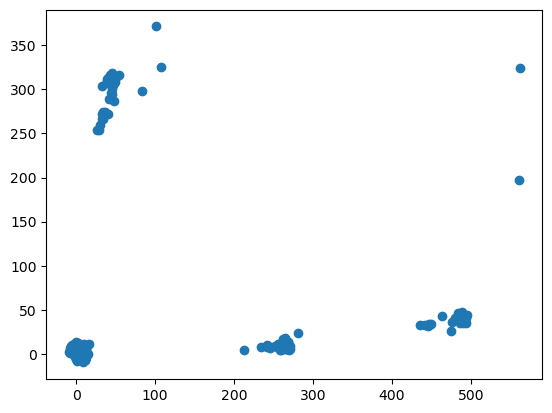

In [11]:
def plot_swarm(swarm):
    plt.scatter(x=swarm[:,:,0],y=swarm[:,:,1])
    plt.show()

def simulate():
    scene = Scene(600,600)
    swarm = scene.init_swarm(200)
    csv_content = ['id,x,y,iteration']
    for iteration in np.arange(301):
        plot_swarm(swarm)
        for i, particle in enumerate(swarm):
            # print(f'{i}, {particle[0]}, {particle[1]}, {iteration}')
            csv_content.append(f'{i}, {particle[0][0]}, {particle[0][1]}, {iteration}')
            neighbors = scene.get_neighbors(particle, swarm, 100)
            particle = update_particle(particle, neighbors, 100, 20, 4)
            swarm[i] = wrap_particle(particle, scene.width, scene.height)
    return csv_content

csv_content = simulate()
with open('test_1.csv', 'w') as csv:
    for line in csv_content:
        csv.write(line+'\n')

In [12]:
np.arctan2(30, 45)

0.5880026035475675